In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats

#preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score #calculate the mean squared error between the true and predicted values in a regression problem.
from sklearn.datasets import make_regression #generate synthetic regression problem for testing

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt #plot graphs
import seaborn as sns #plot based on matpolit
sns.set()
%matplotlib inline 
#used in Jupyter notebooks to display Matplotlib plots inline.

# evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# classifier we will use
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# model selection bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

# evaluation
from sklearn.metrics import f1_score

# plotting
#from plotting import plot_learning_curve, plot_validation_curve

print("ML and AI project kick-off!")

ML and AI project kick-off!


In [6]:
#DATA COLLECTION
import pandas as pd #Load data in tabular format
all_heart_df1 = pd.read_csv("women_heart_attack_prediction_dataset.csv") #Load the file from the specific folder.
#Note: pd.read_csv and not Excel. Replace the \ for /. If the file has ; but need , use sep= ';' to replace the ; for ,

In [7]:
#S T A T I S T I C S (EDA)

# all_heart_df1 is DataFrame
# Copy the DataFrame to avoid modifying the original data
df = all_heart_df1.copy()

In [8]:
#filter the data set just for women
    # Filter the DataFrame for only females
female_heart_df2 = df[df['Sex'] == 'Female']


In [9]:
female_heart_df2.sample(10)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
6741    YTR5694   18  Female          220         120/95          81   
366     TBH2833   67  Female          343         148/87          46   
1705    LNK2826   58  Female          207         159/73          90   
3641    KGI5279   84  Female          333         115/83          84   
3440    RAH6719   52  Female          352          99/62          54   
374     EHN8840   83  Female          326          99/83          89   
6023    MIK6050   62  Female          323         101/78          52   
923     TIQ7594   85  Female          207         173/88         108   
7038    LQY2740   36  Female          164         123/90          83   
8643    YXE2036   49  Female          155         126/78          93   

      Diabetes  Family History  Smoking  Obesity  ...  \
6741         0               1        0        1  ...   
366          1               0        1        1  ...   
1705         1               1        1        0  ...   
3641         1               1        1        0  ...   
3440         1               1        1        1  ...   
374          1               0        1        0  ...   
6023         0               0        1        0  ...   
923          1               1        1        0  ...   
7038         0               1        0        0  ...   
8643         1               1        1        1  ...   

      Sedentary Hours Per Day  Income        BMI  Triglycerides  \
6741                 3.285620  276481  23.161548            220   
366                  7.603678  156241  39.156357            719   
1705                 7.094790  179399  32.135706            439   
3641                 9.124427  216871  39.041434            618   
3440                 8.421591   43277  26.948992            596   
374                 10.726967   24274  35.438040            180   
6023                 2.973757  113456  25.018980            513   
923                  6.860001  262398  39.853337            339   
7038                 5.534193  197833  29.219033            416   
8643                 6.736667  164303  23.690230            154   

      Physical Activity Days Per Week  Sleep Hours Per Day       Country  \
6741                                7                    4       Germany   
366                                 7                    4     Argentina   
1705                                3                   10       Vietnam   
3641                                2                    7        Canada   
3440                                3                    8   South Korea   
374                                 0                    4         China   
6023                                2                    4  South Africa   
923                                 0                    9         India   
7038                                1                    8     Australia   
8643                                3                    5     Argentina   

          Continent           Hemisphere  Heart Attack Risk  
6741         Europe  Northern Hemisphere                  0  
366   South America  Southern Hemisphere                  1  
1705           Asia  Northern Hemisphere                  0  
3641  North America  Northern Hemisphere                  1  
3440           Asia  Northern Hemisphere                  0  
374            Asia  Northern Hemisphere                  1  
6023         Africa  Southern Hemisphere                  0  
923            Asia  Northern Hemisphere                  0  
7038      Australia  Southern Hemisphere                  0  
8643  South America  Southern Hemisphere                  0  

[10 rows x 26 columns]

In [10]:
female_heart_df2.isna().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [11]:
female_heart_df2.duplicated().sum()

0

In [12]:
#S T A T I S T I C S (EDA)
#VARIABLES DATA TYPES e.g., X INDEPENDENT
#X (predictor variables): These are the input features use to predict heart attack risk
#Set up X and Y variables to go into a deeper analysis
#Lucky variables may impact the results of Y, if not included for X as the expalanatory variable.

X= female_heart_df2[['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
                     'Diet','Previous Heart Problems','Stress Level', 'Sedentary Hours Per Day', 'Income','BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']]
X

Age  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
2      21          324         174/99          72         1               0   
5      54          297         172/86          48         1               1   
9      43          248         160/70          55         0               1   
10     73          373         107/69          97         1               1   
18     50          303        120/100         104         1               0   
...   ...          ...            ...         ...       ...             ...   
8750   34          304         102/92          93         0               1   
8754   80          383         153/96          91         1               1   
8757   59          378          93/78          99         0               1   
8759   28          120        157/102          73         1               0   
8762   25          356         138/67          75         1               1   

      Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  \
2           0        0                    0                 2.078353   
5           1        0                    1                 0.625008   
9           1        1                    1                 0.194515   
10          1        0                    1                16.841988   
18          1        0                    1                 4.943580   
...       ...      ...                  ...                      ...   
8750        0        1                    1                 6.658321   
8754        1        0                    1                 6.082656   
8757        1        1                    0                 1.857908   
8759        0        1                    0                16.558426   
8762        0        0                    1                18.081748   

           Diet  Previous Heart Problems  Stress Level  \
2       Healthy                        1             9   
5     Unhealthy                        1             2   
9     Unhealthy                        0             4   
10      Average                        1             8   
18      Average                        1             1   
...         ...                      ...           ...   
8750    Average                        0            10   
8754    Healthy                        1             3   
8757    Healthy                        0             4   
8759    Healthy                        0             8   
8762    Healthy                        0             8   

      Sedentary Hours Per Day  Income        BMI  \
2                    9.463426  235282  28.176571   
5                    7.798752  241339  20.146840   
9                    4.055115  209703  22.558917   
10                   8.919879   50030  22.867911   
18                   7.586984   21501  25.964351   
...                       ...     ...        ...   
8750                 6.900037  223874  22.418494   
8754                 8.234883  101341  20.490450   
8757                 7.495231   70415  39.976061   
8759                 3.833038  217881  23.993866   
8762                 9.005234  247338  32.914151   

      Physical Activity Days Per Week  Sleep Hours Per Day  
2                                   4                    4  
5                                   5                   10  
9                                   7                    7  
10                                  0                    4  
18                                  1                    5  
...                               ...                  ...  
8750                                4                    5  
8754                                3                    4  
8757                                1                    9  
8759                                4                    9  
8762                                7                    4  

[2652 rows x 18 columns]

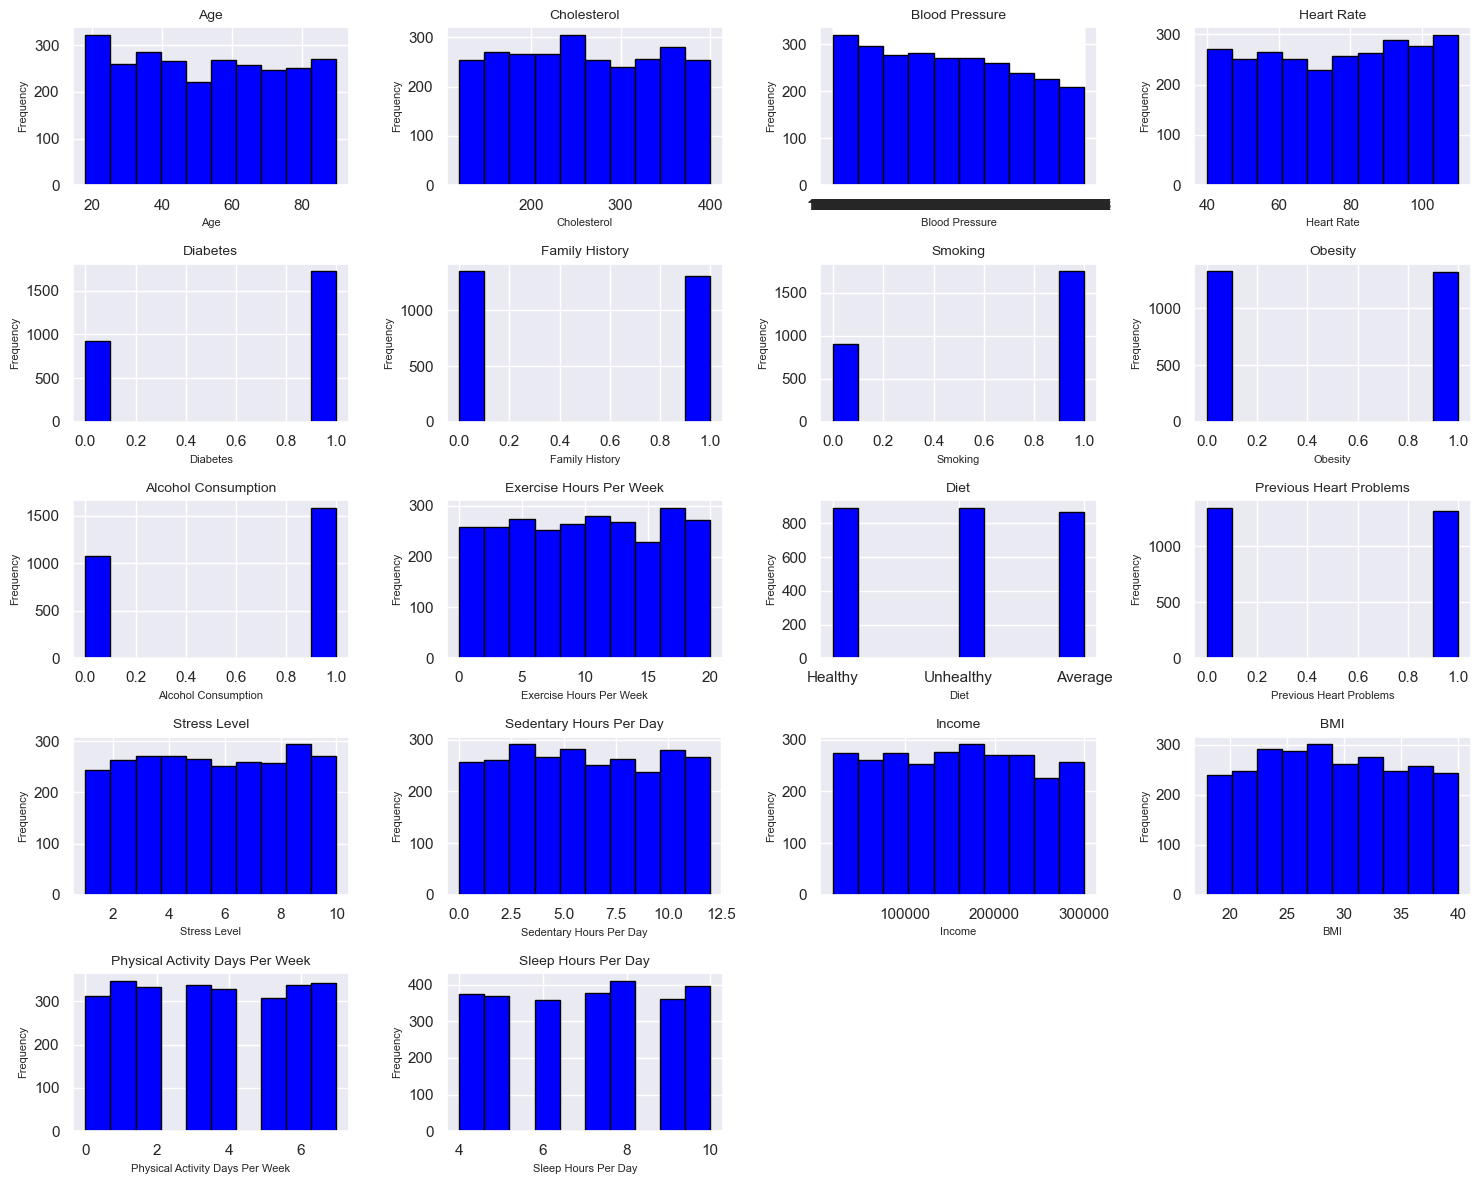

In [14]:
# Create histograms for each column in X
X_columns = X.columns
plt.figure(figsize=(15, 12))  # Adjust figure size to fit all plots

# Iterate through each column and create a subplot for its histogram
for i, column in enumerate(X_columns, 1):
    plt.subplot(5, 4, i)  # Create a 5x4 grid of subplots
    plt.hist(X[column].dropna(), bins=10, color='blue', edgecolor='black')
    plt.title(column, fontsize=10)  # Decrease font size of the title
    plt.xlabel(column, fontsize=8)  # Decrease font size of the x-axis label
    plt.ylabel('Frequency', fontsize=8)  # Decrease font size of the y-axis label

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [15]:
#S T A T I S T I C S (EDA)
#VARIABLES DATA TYPES e.g., Y DEPENDENT
#Set up X and Y variables to go into a deeper analysis
#Y (target variable): This is the outcome trying to predict, which is the Heart Attack Risk
#Lucky variables may impact the results of Y, if not included for X as the expalanatory variable.
Y= female_heart_df2 [['Heart Attack Risk']] #Y= Target variable. Potential to include more variables for Y here. Lucky variables may impact the results of Y.
#(1: Yes, 0: No)
Y

Heart Attack Risk
2                     0
5                     1
9                     0
10                    0
18                    1
...                 ...
8750                  0
8754                  1
8757                  0
8759                  0
8762                  1

[2652 rows x 1 columns]

In [16]:
female_heart_df2['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    1708
1     944
Name: count, dtype: int64

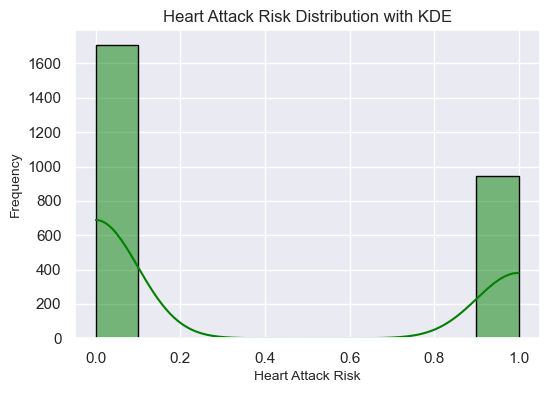

In [17]:
# Create a histogram with a (distribution line)
plt.figure(figsize=(6, 4))
sns.histplot(Y['Heart Attack Risk'].dropna(), bins=10, kde=True, color='green', edgecolor='black')

# Add title and labels
plt.title('Heart Attack Risk Distribution with KDE', fontsize=12)
plt.xlabel('Heart Attack Risk', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.show()
#Heart Attack Risk: Presence of heart attack risk (1: Yes, 0: No)
    #Analysis: Right Skewed Distribution. (Positive-Skewed). Mean > Median

In [18]:
#S T A T I S T I C S (EDA)
#DATA TYPES in df4
#Explore the Data for X and Y:
X.shape
Y.shape

X.head()
Y.head()

X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2652 entries, 2 to 8762
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              2652 non-null   int64  
 1   Cholesterol                      2652 non-null   int64  
 2   Blood Pressure                   2652 non-null   object 
 3   Heart Rate                       2652 non-null   int64  
 4   Diabetes                         2652 non-null   int64  
 5   Family History                   2652 non-null   int64  
 6   Smoking                          2652 non-null   int64  
 7   Obesity                          2652 non-null   int64  
 8   Alcohol Consumption              2652 non-null   int64  
 9   Exercise Hours Per Week          2652 non-null   float64
 10  Diet                             2652 non-null   object 
 11  Previous Heart Problems          2652 non-null   int64  
 12  Stress Level             

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\3962538555.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


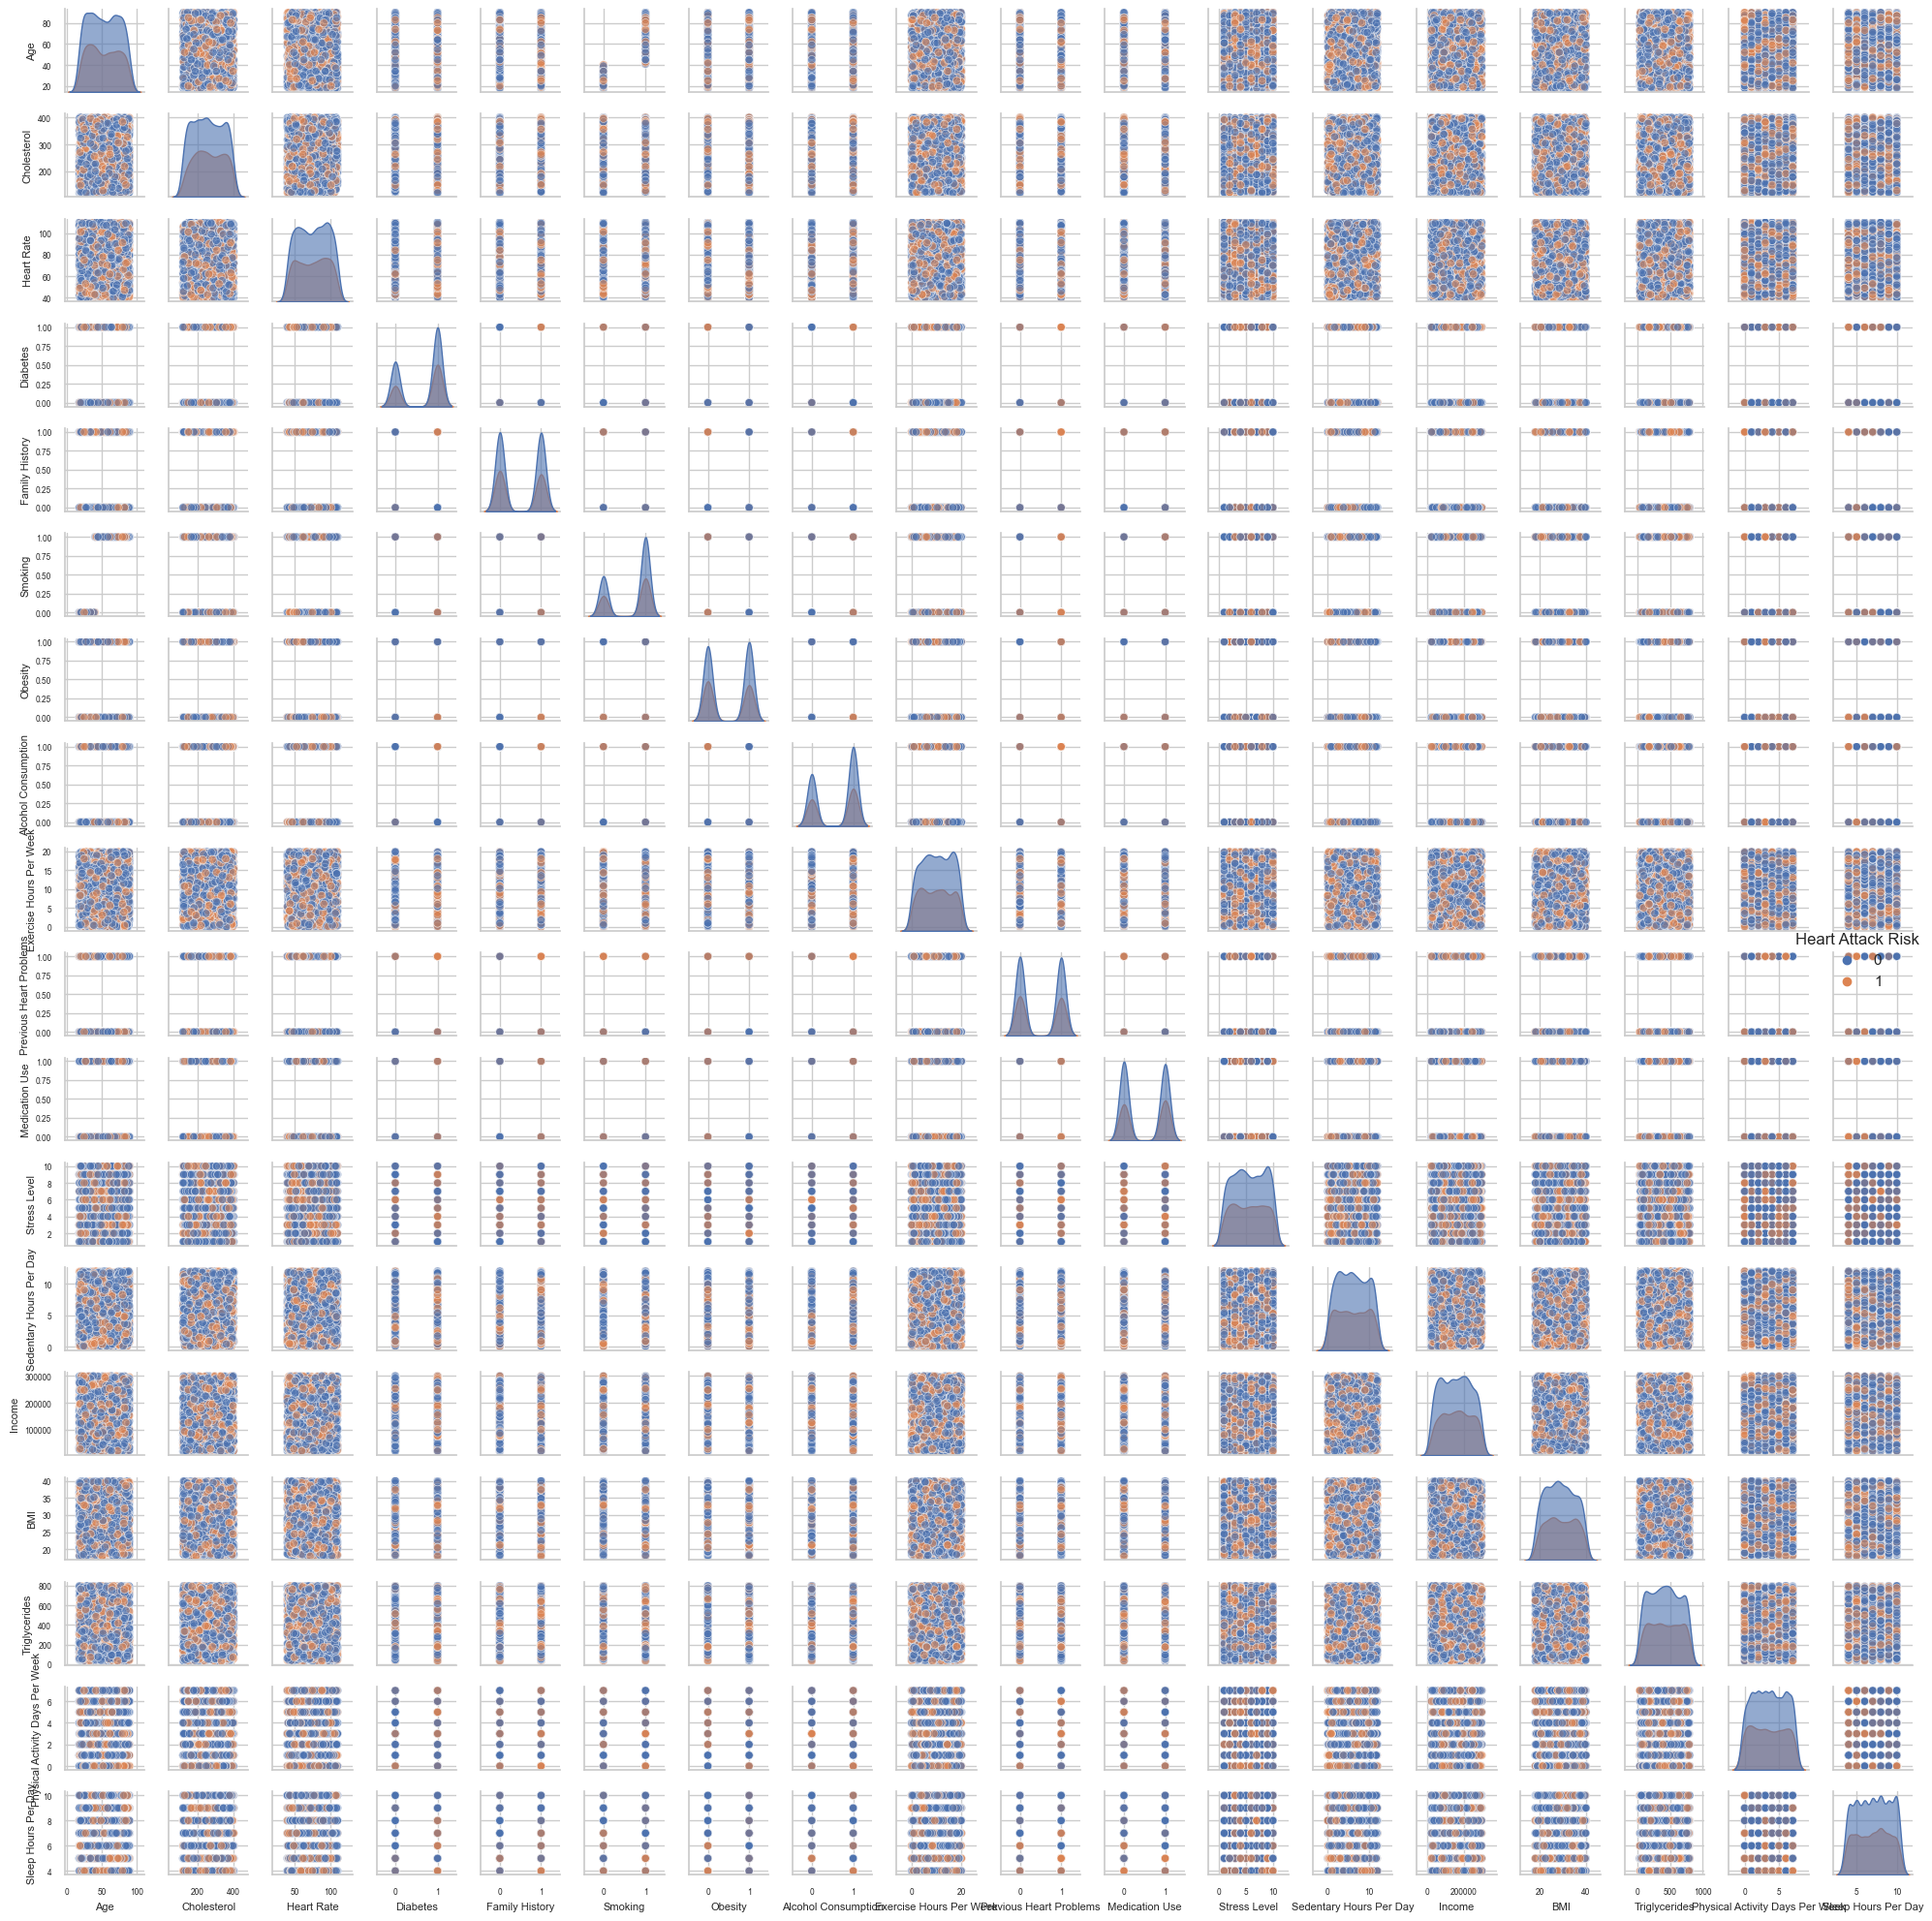

In [19]:
# Set the style for better aesthetics
sns.set_style("whitegrid")

# Create the pairplot with increased figure size and improved aesthetics
g = sns.pairplot(female_heart_df2, hue='Heart Attack Risk', 
                 height=3,  # Increase the size of each subplot
                 aspect=1,  # Keep the aspect ratio square
                 plot_kws={'alpha': 0.6},  # Add some transparency to the points
                 diag_kws={'alpha': 0.6})  # Add transparency to diagonal plots as well

# Adjust the overall figure size
g.fig.set_size_inches(20, 20)

# Improve the legend
g._legend.set_title("Heart Attack Risk")  #Orange: Heart Attack and  #Blue: No Heart Attack

# Decrease the label size for x and y axes
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.tick_params(labelsize=6)  # Decrease tick label size

plt.tight_layout()
plt.show()

In [20]:
#S T A T I S T I C S (EDA)
#DATA CLEANUP in df4
#Finding missing values: .isnull().sum() is one of many ways to check for missing values
X.isnull().sum() # no missing value is 0

Age                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
dtype: int64

In [21]:
#S T A T I S T I C S (EDA)
Y.isnull().sum() # no missing value is 0

Heart Attack Risk    0
dtype: int64

In [22]:
X.describe() 
#Q3=75% of individuals
#Q2= 50% Median
#Q1=25% of individuals 

Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  2652.000000  2652.000000  2652.000000  2652.000000     2652.000000   
mean     53.060709   258.942685    75.362368     0.649698        0.491327   
std      21.287042    80.545699    20.642242     0.477154        0.500019   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      34.000000   192.000000    57.000000     0.000000        0.000000   
50%      53.000000   256.000000    76.000000     1.000000        0.000000   
75%      72.000000   329.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  2652.000000  2652.000000          2652.000000              2652.000000   
mean      0.659125     0.499623             0.596531                10.075528   
std       0.474093     0.500094             0.490686                 5.795962   
min       0.000000     0.000000             0.000000                 0.007422   
25%       0.000000     0.000000             0.000000                 5.116186   
50%       1.000000     0.000000             1.000000                10.137350   
75%       1.000000     1.000000             1.000000                15.204874   
max       1.000000     1.000000             1.000000                19.998709   

       Previous Heart Problems  Stress Level  Sedentary Hours Per Day  \
count              2652.000000   2652.000000              2652.000000   
mean                  0.494344      5.564480                 5.977934   
std                   0.500062      2.874987                 3.475824   
min                   0.000000      1.000000                 0.008307   
25%                   0.000000      3.000000                 2.964552   
50%                   0.000000      6.000000                 5.868854   
75%                   1.000000      8.000000                 9.043740   
max                   1.000000     10.000000                11.999313   

              Income          BMI  Physical Activity Days Per Week  \
count    2652.000000  2652.000000                      2652.000000   
mean   157937.871041    28.920420                         3.516214   
std     80171.929679     6.156616                         2.291663   
min     20062.000000    18.002337                         0.000000   
25%     87749.000000    23.687000                         2.000000   
50%    158478.500000    28.757025                         3.000000   
75%    225290.750000    34.212503                         6.000000   
max    299909.000000    39.993581                         7.000000   

       Sleep Hours Per Day  
count          2652.000000  
mean              7.039593  
std               2.004789  
min               4.000000  
25%               5.000000  
50%               7.000000  
75%               9.000000  
max              10.000000

In [36]:
female_heart_df2['Age'].value_counts()
#AGE is Quantitative > Numerical > Integer > Discrete=Finite

Age
25    49
74    48
68    48
33    47
28    47
      ..
47    29
31    27
48    26
72    26
86    25
Name: count, Length: 73, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\3898059825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_heart_df2['Age_Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels)


Counts by Age (Discrete):
Age
18    33
19    45
20    46
21    37
22    29
      ..
86    25
87    37
88    34
89    30
90    41
Name: count, Length: 73, dtype: int64

Counts by Age_Group:
Age_Group
Young (19-39)     790
Adult (40-59)     690
Senior (>59)     1094
Name: count, dtype: int64


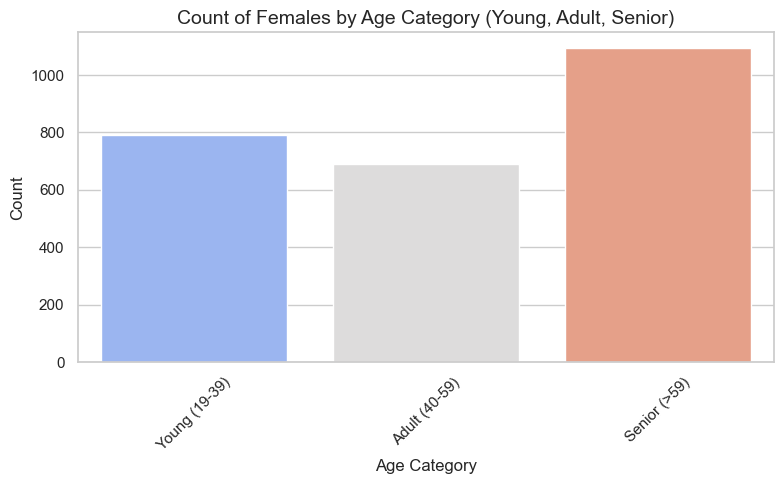

In [44]:
# Create Age_Group column if not already present
# Define the age bins for young, adult, and senior categories
age_bins = [19, 39, 59, 100]  # Bins: 20-39 (Young), 40-59 (Adult), 60+ (Senior)
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>59)']

# Create Age_Group column with the updated bins
female_heart_df2['Age_Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels)

# Count occurrences in each Age_Group
age_group_counts = female_heart_df2['Age_Group'].value_counts().sort_index()

# Display counts for both Age and Age_Group
print("Counts by Age (Discrete):")
print(female_heart_df2['Age'].value_counts().sort_index())

print("\nCounts by Age_Group:")
print(age_group_counts)

# Visualize Age_Group counts
plt.figure(figsize=(8, 5))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='coolwarm')
plt.title('Count of Females by Age Category (Young, Adult, Senior)', fontsize=14)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Analysis Counts by Age_Group:
    #Young (19-39)     790  29.79%
    #Adult (40-59)     690  26.02%
    #Senior (>59)     1094  41.25% 
#This indicates that the largest proportion of females in the dataset falls into the "Senior (>59)" category, making up over 41% of the total. 
#The "Young (19-39)" group accounts for about 29.8%, while "Adult (40-59)" represents approximately 26%.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\2536631023.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=female_heart_df2['Age'], shade=True, color='skyblue', alpha=0.7, label='KDE')


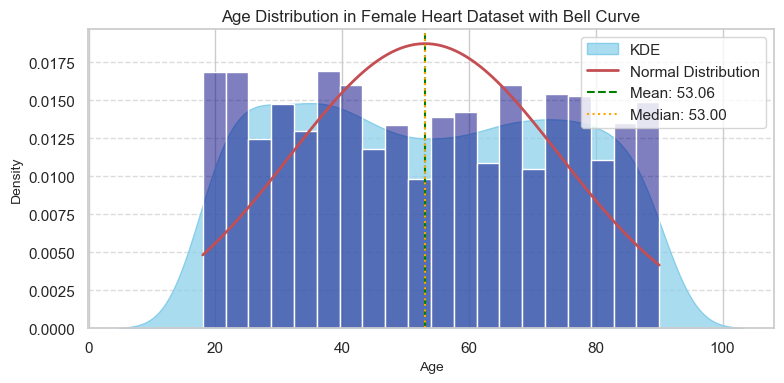

In [45]:
#AGE Female Histogram Distribution

plt.figure(figsize=(8, 4))

# Create KDE plot
sns.kdeplot(data=female_heart_df2['Age'], shade=True, color='skyblue', alpha=0.7, label='KDE')

# Create histogram
sns.histplot(data=female_heart_df2['Age'], bins=20, kde=False, color='navy', alpha=0.5, stat='density')

# Calculate parameters for the bell curve
mean_age = female_heart_df2['Age'].mean()
std_age = female_heart_df2['Age'].std()

# Create bell curve
x = np.linspace(female_heart_df2['Age'].min(), female_heart_df2['Age'].max(), 100)
bell_curve = stats.norm.pdf(x, mean_age, std_age)
plt.plot(x, bell_curve, 'r-', lw=2, label='Normal Distribution')

# Customize the plot
plt.title('Age Distribution in Female Heart Dataset with Bell Curve', fontsize=12)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add mean and median lines
median_age = female_heart_df2['Age'].median()
plt.axvline(mean_age, color='green', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.axvline(median_age, color='orange', linestyle=':', label=f'Median: {median_age:.2f}')

plt.legend()
plt.tight_layout()
plt.show()
#Kernel Density Estimation (KDE) statistical technique used to create a smooth curve on a graph based on a set of data points.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\4049261397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_heart_df2['Systolic BP'] = female_heart_df2['Blood Pressure'].apply(lambda x: float(x.split('/')[0]))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\4049261397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_heart_df2['Diastolic BP'] = female_heart_df2['Blood Pressure'].apply(lambda x: float(x.split('/')[1]))


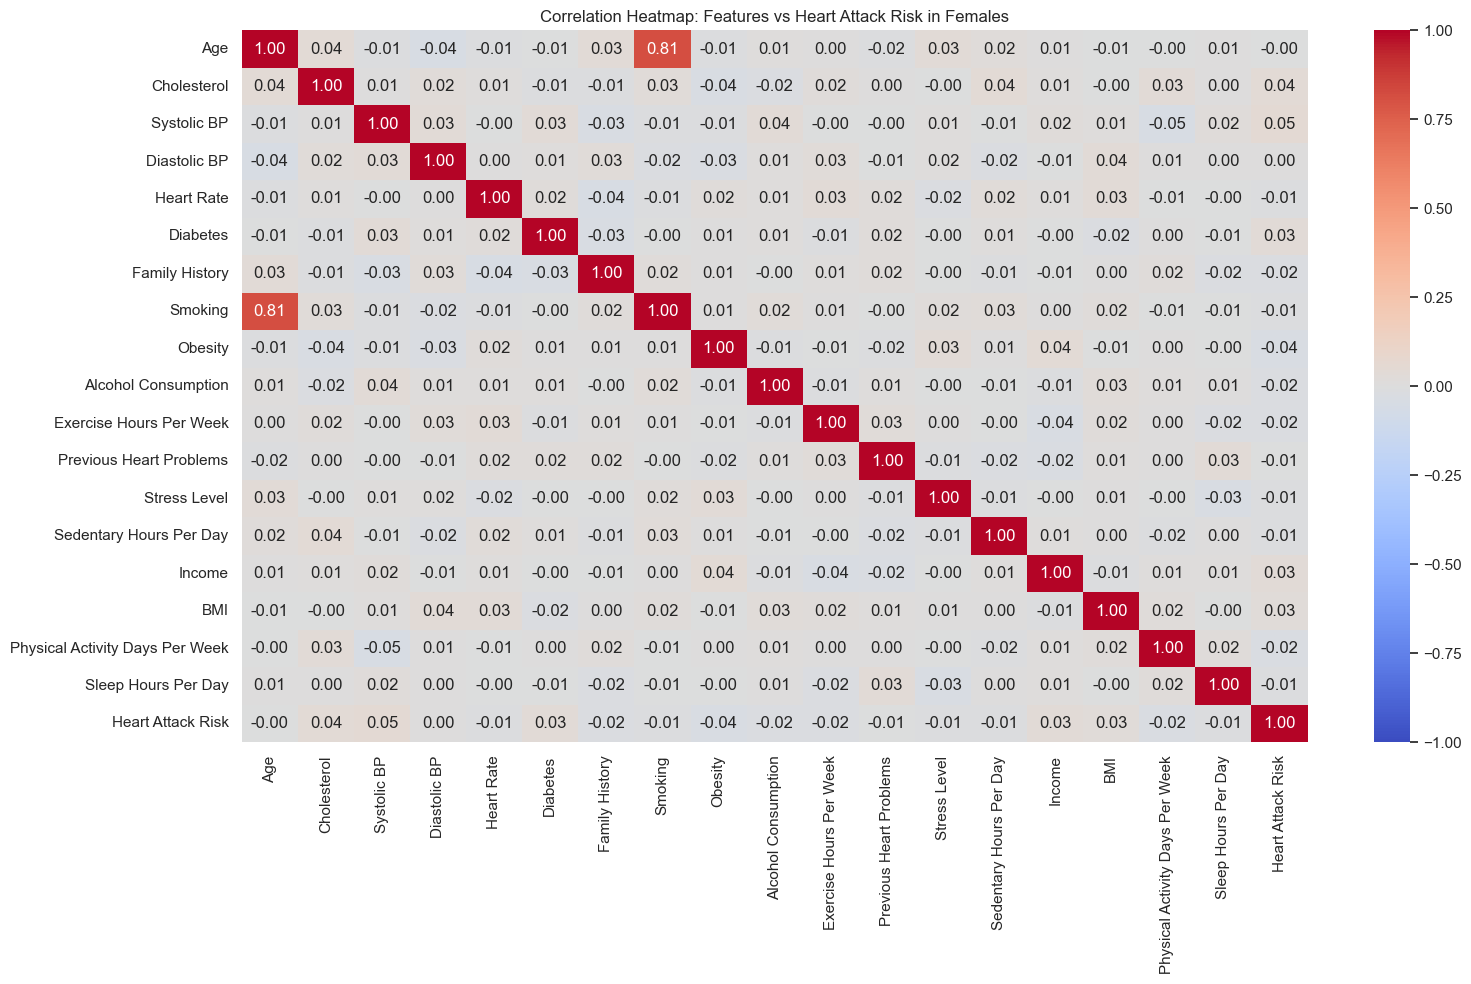

Correlation with Heart Attack Risk:
Heart Attack Risk                  1.000000
Systolic BP                        0.052264
Cholesterol                        0.040986
Diabetes                           0.032496
Income                             0.032024
BMI                                0.027908
Diastolic BP                       0.004462
Age                               -0.003342
Previous Heart Problems           -0.007341
Heart Rate                        -0.007825
Stress Level                      -0.008183
Sedentary Hours Per Day           -0.009020
Smoking                           -0.011986
Sleep Hours Per Day               -0.013506
Alcohol Consumption               -0.019464
Exercise Hours Per Week           -0.019615
Family History                    -0.020184
Physical Activity Days Per Week   -0.023478
Obesity                           -0.037241
Name: Heart Attack Risk, dtype: float64


In [46]:
#Heat Map
#To create a heatmap of the correlation between the numerical variables and the heart attack risk 

# Preprocess the Blood Pressure column
female_heart_df2['Systolic BP'] = female_heart_df2['Blood Pressure'].apply(lambda x: float(x.split('/')[0]))
female_heart_df2['Diastolic BP'] = female_heart_df2['Blood Pressure'].apply(lambda x: float(x.split('/')[1]))

# Define X with the new blood pressure columns
X = female_heart_df2[['Age', 'Cholesterol', 'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Diabetes', 'Family History', 
                      'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
                      'Previous Heart Problems', 'Stress Level', 'Sedentary Hours Per Day', 
                      'Income', 'BMI', 'Physical Activity Days Per Week', 'Sleep Hours Per Day']] 
#Convert blood preassure and remove diet as those are Objects data type. Removed categorical vairables from the list.
Y = female_heart_df2[['Heart Attack Risk']]

# Combine X and Y
data = pd.concat([X, Y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap: Features vs Heart Attack Risk in Females')
plt.tight_layout()
plt.show()

# Print the correlation with Heart Attack Risk
print("Correlation with Heart Attack Risk:")
print(correlation_matrix['Heart Attack Risk'].sort_values(ascending=False))

In [47]:
#Analysis: 
    #RED: Diagonal boxes (top left to bottom right): The value 1.00 in red indicates perfect positive correlation. This is normal and expected, as it represents each variable's correlation with itself.
    #GRAY: Blue boxes with values around 0.04 or -0.01 or others zeros indicate very weak or no correlations between variables.
        #Positive values (0.04) suggest a slight positive relationship.
        #Negative values (-0.01) suggest a slight negative relationship.
    #ORANEG: Dark orange boxes at the bottom right (0.81):These indicate moderately strong positive correlations between variables.
#Values closer to 1 represent stronger positive relationships.
#The orange/red color typically represents stronger positive correlations.


In [48]:
#RISK FACTOR = Blood Pressure

#BLOOD PREASSURE: Quantitative > Numerical > Integer > Continuos
female_heart_df2['Blood Pressure'].value_counts() #Blood pressure of the patient (systolic/diastolic)
#Analysis: out of 2652 female patients a total of 1723 equivalent to (64.9%) has diabetes (1)
                                     # a total of  929 equivalent to (35%) do not have diabetes (0)

#96/96 appears 4 times, as does 150/67, 176/77, and 129/106. This indicates that these values occur repeatedly among the patients in the dataset. Values like 134/65 appear 3 times, while other readings like 129/74 and 172/78 occur only once. These counts help identify the most common blood pressure readings in the dataset.

Blood Pressure
96/96      4
150/67     4
176/77     4
129/106    4
134/65     3
          ..
129/74     1
172/78     1
142/90     1
127/107    1
138/67     1
Name: count, Length: 2012, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\3811036838.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers[['Systolic', 'Diastolic']] = smokers['Blood Pressure'].str.split('/', expand=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\3811036838.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['Systolic'] = pd.to_numeric(smokers['Systolic'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\3811036838.py:11: SettingWithCopyWarning: 
A v

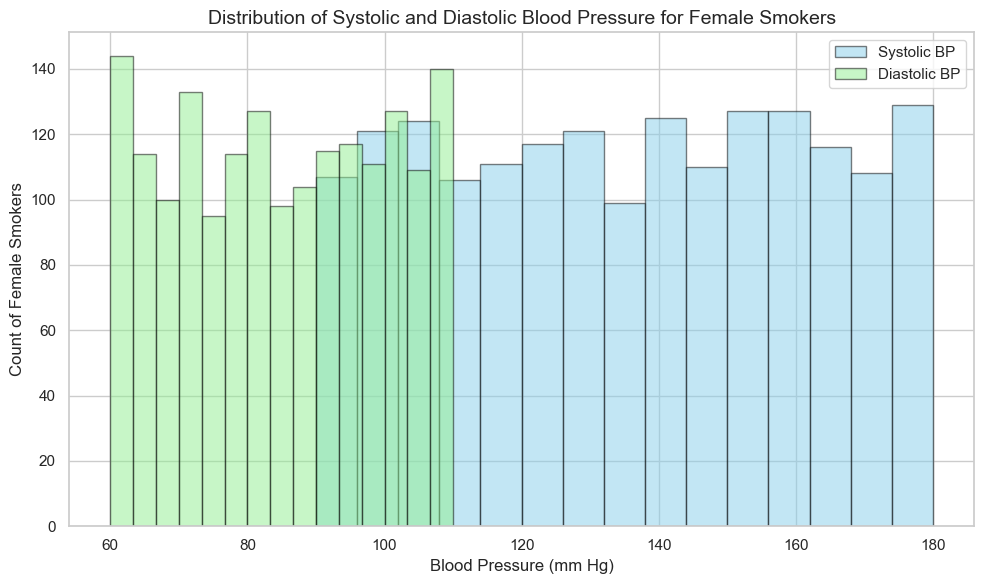

In [50]:
#RISK FACTOR = Blood Pressure

# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Split the 'Blood Pressure' column into separate 'Systolic' and 'Diastolic' columns
smokers[['Systolic', 'Diastolic']] = smokers['Blood Pressure'].str.split('/', expand=True)

# Convert the 'Systolic' and 'Diastolic' columns to numeric values
smokers['Systolic'] = pd.to_numeric(smokers['Systolic'], errors='coerce')
smokers['Diastolic'] = pd.to_numeric(smokers['Diastolic'], errors='coerce')

# Create the plot for systolic and diastolic blood pressure distributions
plt.figure(figsize=(10, 6))

# Plot histograms for both systolic and diastolic blood pressure for female smokers
plt.hist(smokers['Systolic'], bins=15, alpha=0.5, label='Systolic BP', color='skyblue', edgecolor='black')
plt.hist(smokers['Diastolic'], bins=15, alpha=0.5, label='Diastolic BP', color='lightgreen', edgecolor='black')

# Customize the plot
plt.title('Distribution of Systolic and Diastolic Blood Pressure for Female Smokers', fontsize=14)
plt.xlabel('Blood Pressure (mm Hg)', fontsize=12)
plt.ylabel('Count of Female Smokers', fontsize=12)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
#Analysis: In the female smoker population, the diastolic blood preassure is higher than the systolic blood preassure with a tendency to lead ot more heart attacks

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\1343550215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_heart_df2[['Systolic', 'Diastolic']] = female_heart_df2['Blood Pressure'].str.split('/', expand=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\1343550215.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_heart_df2['Systolic'] = pd.to_numeric(female_heart_df2['Systolic'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\1343550215.

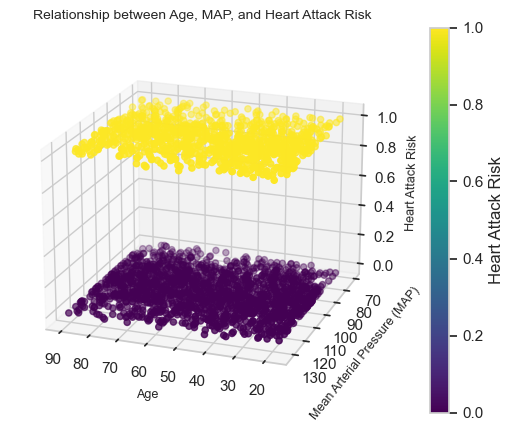

In [51]:
#Blood Preassure
# Split the 'Blood Pressure' column into two separate columns for systolic and diastolic
female_heart_df2[['Systolic', 'Diastolic']] = female_heart_df2['Blood Pressure'].str.split('/', expand=True)

# Convert the systolic and diastolic columns to numeric
female_heart_df2['Systolic'] = pd.to_numeric(female_heart_df2['Systolic'], errors='coerce')
female_heart_df2['Diastolic'] = pd.to_numeric(female_heart_df2['Diastolic'], errors='coerce')

# Calculate Mean Arterial Pressure (MAP)
female_heart_df2['MAP'] = (female_heart_df2['Systolic'] + 2 * female_heart_df2['Diastolic']) / 3

# Use MAP for Blood Pressure representation
x = female_heart_df2['Age']
y = female_heart_df2['MAP']
z = female_heart_df2['Heart Attack Risk']

# Create the 3D scatter plot
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Set larger fonts for the labels and title
ax.set_xlabel('Age', fontsize=9)
ax.set_ylabel('Mean Arterial Pressure (MAP)', fontsize=9)
ax.set_zlabel('Heart Attack Risk', fontsize=9)
ax.set_title('Relationship between Age, MAP, and Heart Attack Risk', fontsize=10)

# Adjust the view angle to make the z-axis label more visible
ax.view_init(elev=20, azim=110)

# Add a color bar to map the color to Heart Attack Risk
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Heart Attack Risk')

# Show the plot
plt.show()

In [52]:
#'Blood Pressure'

#Purple is (0) no Heart attack Risk
#Yellow is (1) yes Heart attacke Risk
    #The scatter plot graph displays a strong relationship for female between eh age of 20 to 80 years old and MAP of 80 to 120 to have a risk of heart attack.
   #However, more data is needed to validate the results. 

In [72]:
#Female AGE by Categories
# Define the age bins for young, adult, and senior categories
age_bins = [19, 39, 59, 100]  # Bins: 20-39 (Young), 40-59 (Adult), 60+ (Senior)

# Define the corresponding labels for each bin
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>60)']

# Add a new column to categorize ages into Young, Adult, and Senior
female_heart_df2['Age Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels, right=True)

# 'Heart Attack Risk' is a binary column. Presence of heart attack risk (1: Yes, 0: No)
# Calculate the survival rate for each age group (proportion of those with Heart Attack Risk = 0)
survival_rate_0 = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 0].groupby('Age Group').size() / female_heart_df2.groupby('Age Group').size()
survival_rate_1 = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 1].groupby('Age Group').size() / female_heart_df2.groupby('Age Group').size()

# Convert to DataFrame for easy display
survival_rate_df_0 = survival_rate_0.reset_index(name='Survival Rate if no presence of heart attack (0)')
survival_rate_df_1 = survival_rate_1.reset_index(name='Survival Rate if previous presence of heart attack (1)')
print(survival_rate_df_0)
print(survival_rate_df_1)

       Age Group  Survival Rate if no presence of heart attack (0)
0  Young (19-39)                                          0.627848
1  Adult (40-59)                                          0.647826
2   Senior (>60)                                          0.648080
       Age Group  Survival Rate if previous presence of heart attack (1)
0  Young (19-39)                                           0.372152     
1  Adult (40-59)                                           0.352174     
2   Senior (>60)                                           0.351920     


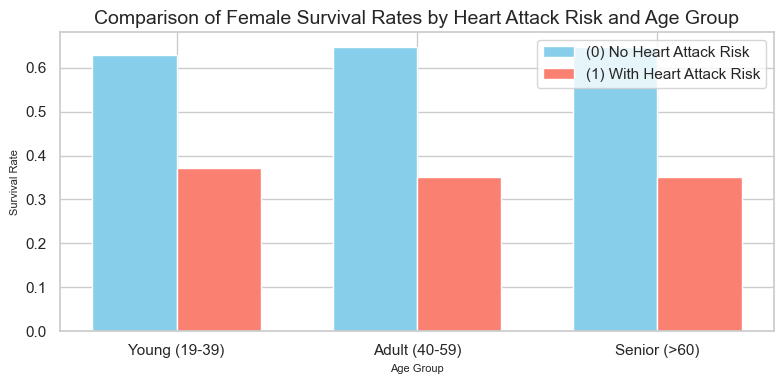

In [73]:
# Corrected variable names for survival_rate_df_0 and survival_rate_df_1
survival_rate_df_0 = survival_rate_0.reset_index(name='Survival Rate (No Heart Attack)')
survival_rate_df_1 = survival_rate_1.reset_index(name='Survival Rate (With Heart Attack)')

# Set up the figure
plt.figure(figsize=(8, 4))

# Define the labels (Age Groups)
age_groups = survival_rate_df_0['Age Group']

# Set the positions and width for the bars
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Plot the bars for both survival rates
plt.bar(x - width/2, survival_rate_df_0['Survival Rate (No Heart Attack)'], width, label='(0) No Heart Attack Risk', color='skyblue')
plt.bar(x + width/2, survival_rate_df_1['Survival Rate (With Heart Attack)'], width, label='(1) With Heart Attack Risk', color='salmon')

# Add some text for labels, title and axes ticks
plt.xlabel('Age Group', fontsize=8)
plt.ylabel('Survival Rate', fontsize=8)
plt.title('Comparison of Female Survival Rates by Heart Attack Risk and Age Group', fontsize=14)
plt.xticks(x, age_groups)  # Set the x-tick labels to the age groups
plt.legend()

# Ensure everything fits and show the plot
plt.tight_layout()
plt.show()

In [74]:
#Analysis: Survivial if 
#'Heart Attack Risk' No Presence of previous heart attack risk 0: No) BLUE
    #Young (Ages 19-39): The survival rate is 62.78%. About 63% of female individuals survived without having a heart attack. While this is a relatively high survival rate, it is slightly lower compared to the other age groups.
    #Adult (Ages 40-59): The survival rate is 64.78%, nearly 65% of individuals survived without a heart attack. This shows a slight improvement in survival compared to the younger age group, suggesting that this group may have better outcomes, perhaps due to lifestyle factors or better health interventions.
    #Senior (Ages 59 and above): The survival rate is 64.81%. This group (with approximately 65% survived without a heart attack. Despite the increased age and generally higher risk of heart conditions, the survival rate in this group is comparable to the adult age group.

#'Heart Attack Risk' Presence of previous heart attack risk 1: Yes) PINK
   #Young (Ages 19-39): The survival rate is 37.21%. Females who had a previous heart attack survived. This is the highest survival rate among the three age groups, indicating that younger individuals may have a slightly better chance of surviving a heart attack compared to older individuals.
   #Adult (Ages 40-59): The survival rate is 35.22%. This means that 35.22% of females who had a previous heart attack survived. This survival rate is slightly lower than the young group, suggesting that as age increases, the chance of surviving a heart attack may decrease, potentially due to the presence of additional risk factors such as comorbidities.
   #Senior (Ages 59 and above): The survival rate is 35.19%. This means that 35.19% of femAles in the senior age group who had a previous heart attack survived.It shows and increased vulnerability of older individuals to complications following a heart attack.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Survival Rate for Smokers without Heart Attack Risk:
 Age Group
Young (19-39)         NaN
Adult (39-59)    0.648318
Senior (>59)     0.648080
dtype: float64
Survival Rate for Smokers with Heart Attack Risk:
 Age Group
Young (19-39)         NaN
Adult (39-59)    0.351682
Senior (>59)     0.351920
dtype: float64
Survival Rate for Non-Smokers without Heart Attack Risk:
 Age Group
Young (19-39)    0.627848
Adult (39-59)    0.638889
Senior (>59)          NaN
dtype: float64
Survival Rate for Non-Smokers with Heart Attack Risk:
 Age Group
Young (19-39)    0.372152
Adult (39-59)    0.361111
Senior (>59)          NaN
dtype: float64


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


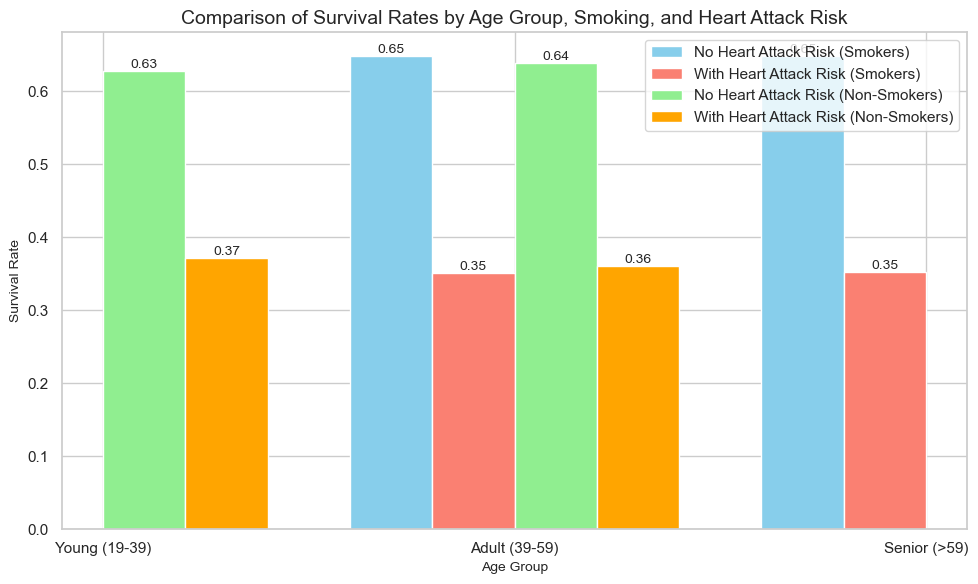

In [56]:
# Calculate survival rates for non-smokers and smokers
survival_rate_0_smokers = female_heart_df2[(female_heart_df2['Heart Attack Risk'] == 0) & (female_heart_df2['Smoking'] == 1)].groupby('Age Group').size() / female_heart_df2[female_heart_df2['Smoking'] == 1].groupby('Age Group').size()
survival_rate_1_smokers = female_heart_df2[(female_heart_df2['Heart Attack Risk'] == 1) & (female_heart_df2['Smoking'] == 1)].groupby('Age Group').size() / female_heart_df2[female_heart_df2['Smoking'] == 1].groupby('Age Group').size()

survival_rate_0_non_smokers = female_heart_df2[(female_heart_df2['Heart Attack Risk'] == 0) & (female_heart_df2['Smoking'] == 0)].groupby('Age Group').size() / female_heart_df2[female_heart_df2['Smoking'] == 0].groupby('Age Group').size()
survival_rate_1_non_smokers = female_heart_df2[(female_heart_df2['Heart Attack Risk'] == 1) & (female_heart_df2['Smoking'] == 0)].groupby('Age Group').size() / female_heart_df2[female_heart_df2['Smoking'] == 0].groupby('Age Group').size()

# Print the survival rates for smokers and non-smokers
print("Survival Rate for Smokers without Heart Attack Risk:\n", survival_rate_0_smokers)
print("Survival Rate for Smokers with Heart Attack Risk:\n", survival_rate_1_smokers)
print("Survival Rate for Non-Smokers without Heart Attack Risk:\n", survival_rate_0_non_smokers)
print("Survival Rate for Non-Smokers with Heart Attack Risk:\n", survival_rate_1_non_smokers)

# Create DataFrames for the survival rates for smokers and non-smokers
survival_rate_df_smokers_0 = survival_rate_0_smokers.reset_index(name='Survival Rate (No Heart Attack, Smokers)')
survival_rate_df_smokers_1 = survival_rate_1_smokers.reset_index(name='Survival Rate (With Heart Attack, Smokers)')
survival_rate_df_non_smokers_0 = survival_rate_0_non_smokers.reset_index(name='Survival Rate (No Heart Attack, Non-Smokers)')
survival_rate_df_non_smokers_1 = survival_rate_1_non_smokers.reset_index(name='Survival Rate (With Heart Attack, Non-Smokers)')

# Set up the figure
plt.figure(figsize=(10, 6))

# Define the labels (Age Groups)
age_groups = survival_rate_df_smokers_0['Age Group']

# Set the positions and width for the bars
x = np.arange(len(age_groups))  # the label locations
width = 0.2  # the width of the bars

# Plot the bars for both smokers and non-smokers survival rates
bars_smokers_0 = plt.bar(x - width * 1.5, survival_rate_df_smokers_0['Survival Rate (No Heart Attack, Smokers)'], width, label='No Heart Attack Risk (Smokers)', color='skyblue')
bars_smokers_1 = plt.bar(x - width/2, survival_rate_df_smokers_1['Survival Rate (With Heart Attack, Smokers)'], width, label='With Heart Attack Risk (Smokers)', color='salmon')

bars_non_smokers_0 = plt.bar(x + width/2, survival_rate_df_non_smokers_0['Survival Rate (No Heart Attack, Non-Smokers)'], width, label='No Heart Attack Risk (Non-Smokers)', color='lightgreen')
bars_non_smokers_1 = plt.bar(x + width * 1.5, survival_rate_df_non_smokers_1['Survival Rate (With Heart Attack, Non-Smokers)'], width, label='With Heart Attack Risk (Non-Smokers)', color='orange')

# Add values on top of the bars
for bar in bars_smokers_0:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)
    
for bar in bars_smokers_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_non_smokers_0:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_non_smokers_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, title, and axis ticks
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Survival Rate', fontsize=10)
plt.title('Comparison of Survival Rates by Age Group, Smoking, and Heart Attack Risk', fontsize=14)
plt.xticks(x, age_groups)  # Set the x-tick labels to the age groups
plt.legend()

# Ensure everything fits and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Analysis of Survival Rates by Smoking Status and Heart Attack Risk Across Age Groups:

#The survival rates exhibit distinct patterns based on smoking status, heart attack risk, and age group. 
#Among smokers, survival rates without heart attack risk are nearly identical for adults aged 40-59 (64.83%) and seniors over 59 (64.81%), 
#indicating a similar survival trend despite age differences. However, when heart attack risk is present, survival rates drop significantly for these groups,
#with adults at 35.17% and seniors at 35.19%, highlighting the detrimental impact of heart attack risk for smokers.

#For non-smokers, the survival rate without heart attack risk is highest in adults aged 40-59 (63.89%) and slightly lower in younger individuals aged 19-39 (62.78%),
#though data for seniors is missing. Conversely, when heart attack risk is present, survival rates for non-smokers decrease to 37.22% for young individuals and 36.11% for adults, 
#with no data available for seniors. These findings emphasize the compounded risks of smoking and heart attacks across different age groups, underscoring the importance of
#tailored interventions and prevention strategies.


Cholesterol Levels Summary by Age Group (Females Only):
Age Group: Young (19-39), Cholesterol Level: Desirable (Count: 258):
[135, 135, 192, 186, 195, 126, 152, 200, 153, 196, 126, 175, 138, 190, 194, 143, 133, 166, 132, 192, 152, 147, 134, 195, 181, 154, 180, 197, 123, 190, 189, 163, 165, 166, 156, 127, 170, 172, 121, 121, 140, 149, 165, 187, 199, 146, 173, 143, 164, 174, 178, 135, 134, 173, 131, 161, 125, 132, 191, 166, 120, 175, 187, 184, 184, 149, 188, 184, 125, 149, 153, 191, 161, 137, 173, 168, 155, 191, 155, 165, 143, 130, 169, 172, 193, 182, 194, 129, 123, 146, 170, 182, 123, 159, 185, 181, 196, 194, 156, 141, 181, 170, 122, 164, 160, 199, 184, 197, 154, 173, 148, 153, 167, 200, 154, 194, 166, 165, 160, 196, 159, 194, 130, 165, 150, 161, 127, 130, 142, 170, 192, 159, 126, 191, 166, 200, 139, 171, 166, 188, 167, 145, 164, 133, 122, 185, 164, 129, 131, 164, 159, 195, 200, 162, 130, 167, 144, 162, 122, 174, 167, 159, 159, 175, 174, 130, 141, 128, 157, 131, 192, 139, 127, 156, 146

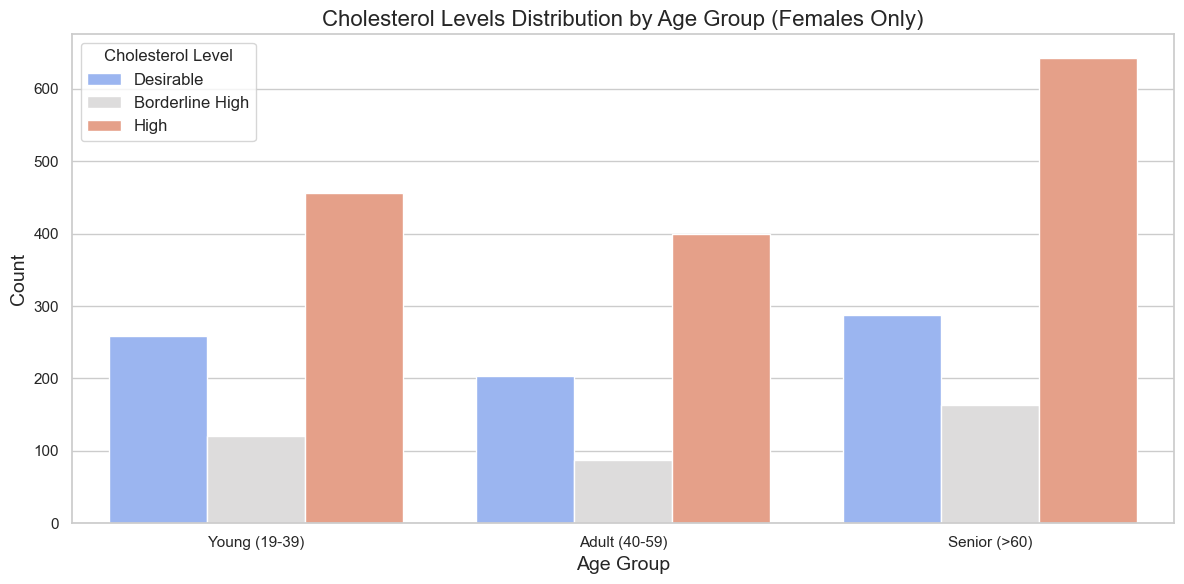

In [75]:
# Define age bins and labels
age_bins = [18, 39, 59, np.inf]  # Adjust bins for "Young", "Adult", and "Senior"
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>60)']

# Define cholesterol bins and labels
cholesterol_bins = [0, 200, 239, np.inf]
cholesterol_labels = ['Desirable', 'Borderline High', 'High']

# 'Sex' column is present, filter for females only
female_heart_df2 = df[df['Sex'] == 'Female'].copy()

# Categorize ages into groups
female_heart_df2['Age_Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels, right=True)

# Categorize cholesterol levels
female_heart_df2['Cholesterol_Level'] = pd.cut(female_heart_df2['Cholesterol'], bins=cholesterol_bins, labels=cholesterol_labels)

# Group data by Age Group and Cholesterol Level for summary
summary = female_heart_df2.groupby(['Age_Group', 'Cholesterol_Level'])['Cholesterol'].apply(list)

# Create a summary DataFrame for visualization
summary_counts = female_heart_df2.groupby(['Age_Group', 'Cholesterol_Level']).size().reset_index(name='Count')

# Print the cholesterol summary by age group
print("\nCholesterol Levels Summary by Age Group (Females Only):")
for (age_group, cholesterol_level), chol_values in summary.items():
    print(f"Age Group: {age_group}, Cholesterol Level: {cholesterol_level} (Count: {len(chol_values)}):")
    print(chol_values)
    print("-" * 50)

# Plot the distribution of cholesterol levels by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_counts, x='Age_Group', y='Count', hue='Cholesterol_Level', palette='coolwarm')
plt.title('Cholesterol Levels Distribution by Age Group (Females Only)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cholesterol Level', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#RISK FACTOR = Cholesterol 
#CHOLESTEROL: Quantitative > Numerical > Integer > Continuos
#Analysis: From 150 to 400. High cholesterol generally means your total cholesterol is 200 mg/dL or higher.
    
#Analysis of Cholesterol Levels in Females:

#In a dataset comprising 8,763 individuals, with 6,111 males and 2,652 females,
#the cholesterol levels of females were categorized into three groups: Desirable, Borderline High, and High. 
#Among the females, 758 (28.6%) fall into the "Desirable" category, indicating optimal cholesterol levels below 200 mg/dL. 
#The "Borderline High" category comprises 384 females (14.5%), with cholesterol levels between 200 and 239 mg/dL, a range often associated with moderate risk. 
#Alarmingly, the majority of females, 1,510 (56.9%), are in the "High" cholesterol category, with levels above 240 mg/dL, a significant risk factor for cardiovascular diseases such as heart attacks.

#Considering that females account for approximately 30% of the dataset, these statistics highlight a pressing concern. 
#The high proportion of females with elevated cholesterol levels underscores the importance of targeted interventions and cholesterol management programs specifically tailored to women. 
#These findings also suggest the need for further analysis into associated lifestyle factors and health metrics to address this critical health issue effectively.

#Cholesterol and Age Group
#The analysis reveals distinct patterns in cholesterol levels across age groups among females. 
#In the Young (19-39) category, the majority exhibit high cholesterol levels (456), 
#followed by those with desirable (258) and borderline high cholesterol (121). 

#Among Adults (40-59), the trend is similar, with the highest count in the high cholesterol category (399), 
#but a slightly lower proportion of desirable levels (203) and borderline high cases (88). 

#In the Senior (>60) group, high cholesterol levels dominate even more significantly (643), accompanied by 287 individuals with desirable levels 
#and 164 with borderline high cholesterol. 

#This progression highlights a concerning trend of increasing high cholesterol prevalence with age, underscoring the need for targeted interventions to manage cholesterol levels, especially in older populations.



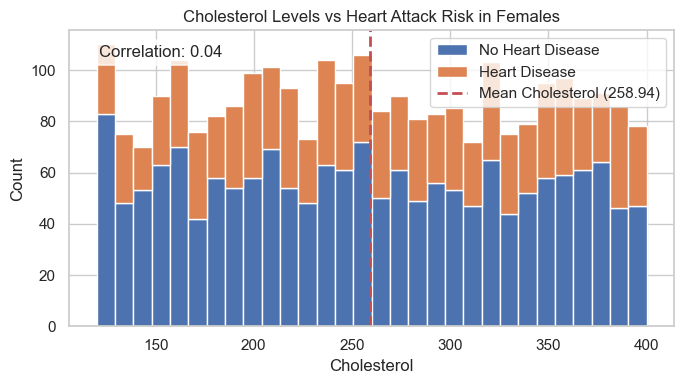

Mean Cholesterol: 258.94
Correlation between Cholesterol and Heart Disease: 0.04


In [76]:
#'Cholesterol'

# Create separate datasets for those with and without heart disease
heart_disease = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 1]['Cholesterol']
no_heart_disease = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 0]['Cholesterol']

# Create the histogram
plt.figure(figsize=(7, 4))
plt.hist([no_heart_disease, heart_disease], bins=30, stacked=True,
         label=['No Heart Disease', 'Heart Disease'])

plt.title('Cholesterol Levels vs Heart Attack Risk in Females')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend()

# Calculate and display the correlation coefficient
correlation = female_heart_df2['Cholesterol'].corr(female_heart_df2['Heart Attack Risk'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a vertical line for the mean cholesterol level
mean_cholesterol = female_heart_df2['Cholesterol'].mean()
plt.axvline(mean_cholesterol, color='r', linestyle='dashed', linewidth=2, label=f'Mean Cholesterol ({mean_cholesterol:.2f})')

plt.legend()
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Mean Cholesterol: {mean_cholesterol:.2f}")
print(f"Correlation between Cholesterol and Heart Disease: {correlation:.2f}")

In [65]:
#Cholesterol Analysis
    #High cholesterol generally means your total cholesterol is 200 mg/dL or higher. The mean Mean Cholesterol: 258.94 which is high.
    #Correlation between Cholesterol and Heart Disease: 0.04 This correlation coefficient indicates a very weak positive relationship between 
    #cholesterol levels and heart disease in this dataset. The correlation scale ranges from -1 to 1, where:
        #0 indicates no linear relationship
        #1 indicates a perfect positive relationship
        #-1 indicates a perfect negative relationshipA correlation of 0.04 is very close to 0, suggesting that in this particular dataset, there is almost no linear relationship between cholesterol levels and the occurrence of heart disease in females.
    #The relationship between cholesterol and heart disease in this particular dataset is not straightforward and may be influenced by other factors not captured in this simple correlation (e.g., age, diet, exercise, genetics, other medical conditions).

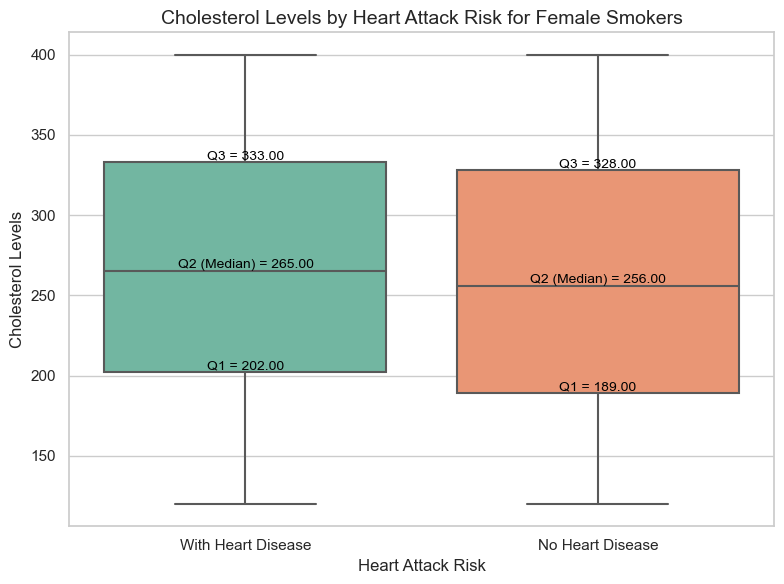

In [77]:
#Cholesterol, Heart Attack Rate and Smoking
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Divide the data into those with heart disease and those without, based on Heart Attack Risk
heart_disease = smokers[smokers['Heart Attack Risk'] == 1]['Cholesterol']
no_heart_disease = smokers[smokers['Heart Attack Risk'] == 0]['Cholesterol']

# Combine the data for the plot
cholesterol_data = pd.DataFrame({
    'Cholesterol': pd.concat([heart_disease, no_heart_disease]),
    'Heart Attack Risk': ['With Heart Disease'] * len(heart_disease) + ['No Heart Disease'] * len(no_heart_disease)
})

# Create a box plot to compare cholesterol levels for female smokers with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='Heart Attack Risk', y='Cholesterol', data=cholesterol_data, palette='Set2')

# Calculate Q1, Q2 (median), and Q3 for each group
Q1_heart_disease = heart_disease.quantile(0.25)
Q2_heart_disease = heart_disease.median()
Q3_heart_disease = heart_disease.quantile(0.75)

Q1_no_heart_disease = no_heart_disease.quantile(0.25)
Q2_no_heart_disease = no_heart_disease.median()
Q3_no_heart_disease = no_heart_disease.quantile(0.75)

# Annotate the quartile values for "With Heart Disease"
plt.text(0, Q1_heart_disease, f'Q1 = {Q1_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(0, Q2_heart_disease, f'Q2 (Median) = {Q2_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(0, Q3_heart_disease, f'Q3 = {Q3_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Annotate the quartile values for "No Heart Disease"
plt.text(1, Q1_no_heart_disease, f'Q1 = {Q1_no_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(1, Q2_no_heart_disease, f'Q2 (Median) = {Q2_no_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(1, Q3_no_heart_disease, f'Q3 = {Q3_no_heart_disease:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Customize the plot
plt.title('Cholesterol Levels by Heart Attack Risk for Female Smokers', fontsize=14)
plt.xlabel('Heart Attack Risk', fontsize=12)
plt.ylabel('Cholesterol Levels', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [67]:
#Q1 (25th percentile) Comparison:
#With Heart Disease (202 mg/dL): 25% of female smokers with heart disease have cholesterol levels below 202 mg/dL.
#Without Heart Disease (189 mg/dL): 25% of female smokers without heart disease have cholesterol levels below 189 mg/dL.
#The cholesterol levels of female smokers with heart disease are higher at the 25th percentile than those without heart disease. This suggests that female smokers with heart disease tend to have higher cholesterol levels, even at the lower end of the distribution.

#Q2 (Median) Comparison:
#With Heart Disease (265 mg/dL): The median cholesterol level for female smokers with heart disease is 265 mg/dL. This means half of these women have cholesterol levels above this value.
#Without Heart Disease (256 mg/dL): The median cholesterol level for female smokers without heart disease is 256 mg/dL.
#The median cholesterol level is higher in female smokers with heart disease compared to those without heart disease. This suggests that cholesterol levels tend to be higher in those with heart disease, indicating a possible correlation between elevated cholesterol and heart disease in smokers.

#Q3 (75th percentile) Comparison:
#With Heart Disease (333 mg/dL): 75% of female smokers with heart disease have cholesterol levels below 333 mg/dL.
#Without Heart Disease (328 mg/dL): 75% of female smokers without heart disease have cholesterol levels below 328 mg/dL.
#At the upper end of the cholesterol distribution (75th percentile), the difference between the two groups is smaller but still notable. Female smokers with heart disease have slightly higher cholesterol levels, indicating that even in the higher ranges, heart disease is associated with elevated cholesterol.

In [78]:
#RISK FACTOR
#DIABETES: Quanlitative > Categorical > Nominal
female_heart_df2['Diabetes'].value_counts() #Whether the patient has diabetes (Yes/No)
#Analysis: out of 2652 female patients a total of 1723 equivalent to (64.9%) has diabetes (1)
                                     # a total of  929 equivalent to (35%) do not have diabetes (0)
#Question: need to modify this variable to Yes or No

Diabetes
1    1723
0     929
Name: count, dtype: int64

In [84]:
# Define age bins and labels
age_bins = [18, 39, 59, np.inf]
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>60)']

# Categorize ages into groups
female_heart_df2['Age_Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels, right=True)



In [51]:
#Diabetes Analysis
    #Mean Diabetes: 0.65 This value suggests that 65% of the females in the dataset have diabetes.
    #Correlation between Diabetes and Heart Disease: 0.03 This correlation coefficient indicates a very weak positive relationship between diabetes and heart disease in this dataset.

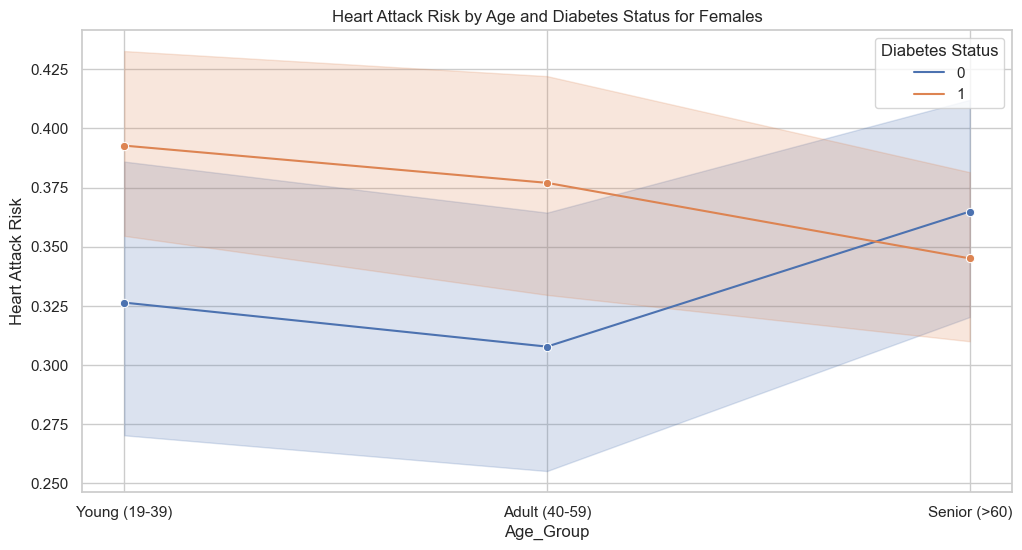

In [86]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_heart_df2, x='Age_Group', y='Heart Attack Risk', hue='Diabetes', marker='o')

# Customize the plot
plt.title('Heart Attack Risk by Age and Diabetes Status for Females')
plt.xlabel('Age_Group')
plt.ylabel('Heart Attack Risk')

# Add a legend
plt.legend(title='Diabetes Status')

# Show the plot
plt.show()

In [88]:
#Analysis: if female has diabetes and is btw Adult group (40 to 50) years old it is present a higher heart attack risk.
#if the female did not have diabetes but is in the Senior group (age 60, 70 and 85) years old it presents higher heart attack risk.

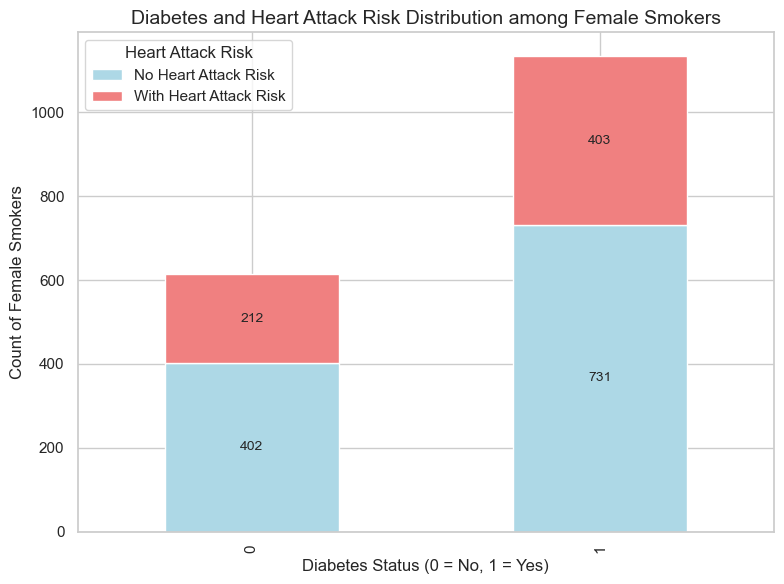

In [87]:
#Diabetes
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Count the number of female smokers with and without diabetes, grouped by heart attack risk
diabetes_heart_attack = smokers.groupby(['Diabetes', 'Heart Attack Risk']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(8, 6))

# Create a stacked bar plot for diabetes status with heart attack risk
diabetes_heart_attack.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], ax=plt.gca())

# Annotate the bars with counts
for i, bars in enumerate(plt.gca().patches):
    plt.gca().text(bars.get_x() + bars.get_width() / 2., bars.get_height() / 2 + bars.get_y(),
                   int(bars.get_height()), ha='center', va='center', fontsize=10)

# Set plot labels and title
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count of Female Smokers', fontsize=12)
plt.title('Diabetes and Heart Attack Risk Distribution among Female Smokers', fontsize=14)

# Customize the legend
plt.legend(['No Heart Attack Risk', 'With Heart Attack Risk'], title='Heart Attack Risk')

# Show plot
plt.tight_layout()
plt.show()
#Analysis: From females that smoke = 1748 
#Females without diabetes (614=34.12%), 402  (65.4%) were not at risk of a heart attack and 212 (34.5%) were at risk of a heart attack
#Females with diabets (1134=64.8%), 731 (64.4%) were not at risk of having a heart attack and 403 (35.53%) were at trisk of having a heartt attack


In [55]:
#RISK FACTOR Heart Rate
#HEART RATE: Quantitative > Numerical > Integer > Continuos
female_heart_df2['Heart Rate'].value_counts() 
#Analysis: the frequency of various heart rates. For instance, a heart rate of 84 occurs 57 times, 97 occurs 55 times, and 52 appears 52 times. This means that a heart rate of 84 is the most common, followed by 97 and 52. Other values, like 71, occur less frequently, with only 23 occurrences. 

Heart Rate
84    57
97    55
52    52
92    48
45    47
      ..
82    29
86    29
67    27
53    27
71    23
Name: count, Length: 71, dtype: int64

In [106]:
# Heart Rate: General categories
hr_bins = [0, 60, 100, np.inf]
hr_labels = ['Bradycardia', 'Normal', 'Tachycardia']
female_heart_df2['Heart_Rate_Category'] = pd.cut(female_heart_df2['Heart Rate'], bins=hr_bins, labels=hr_labels)

print("\nHeart Rate Category Distribution:")
print(female_heart_df2[['Heart Rate', 'Heart_Rate_Category']].head())

# Calculate total counts for each category
female_hr_category_totals = female_heart_df2['Heart_Rate_Category'].value_counts()

# Display totals
print("\nHeart Rate Category Totals for Female Dataset:")
print(female_hr_category_totals)


Heart Rate Category Distribution:
    Heart Rate Heart_Rate_Category
2           72              Normal
5           48         Bradycardia
9           55         Bradycardia
10          97              Normal
18         104         Tachycardia

Heart Rate Category Totals for Female Dataset:
Heart_Rate_Category
Normal         1489
Bradycardia     786
Tachycardia     377
Name: count, dtype: int64


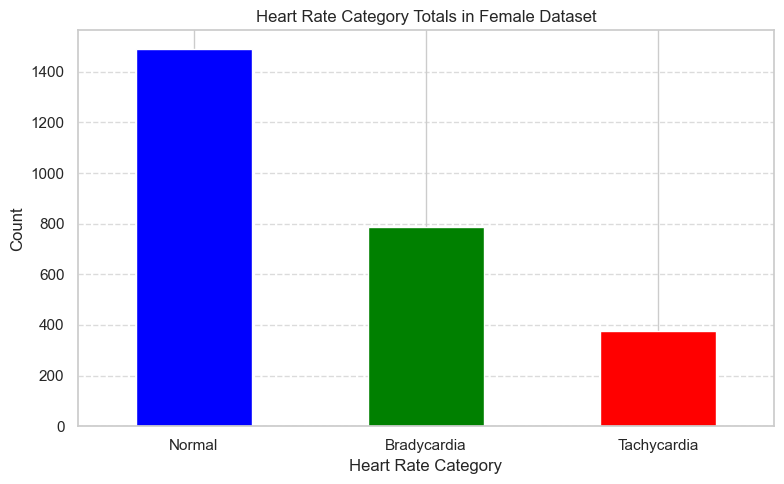

In [108]:
#Plotting the totals
plt.figure(figsize=(8, 5))
female_hr_category_totals.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Heart Rate Category Totals in Female Dataset')
plt.xlabel('Heart Rate Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [109]:
#The data shows that most individuals have a Normal heart rate (1,489), followed by those with Bradycardia (slow heart rate, 786) and Tachycardia (fast heart rate, 377). 
#The analysis of heart rate categories in the female dataset reveals the distribution of individuals across three categories: Bradycardia (heart rate below 60 beats per minute), Normal (heart rate between 60 and 100 beats per minute), and Tachycardia (heart rate above 100 beats per minute). 
#The majority of females fall into the Normal category, indicating a heart rate within the typical healthy range. 
#Bradycardia is the second most common category, followed by Tachycardia. 
#These results are visualized in a bar chart, which highlights the proportion of each category, providing a clear overview of heart rate trends in the dataset. 
#This insight is useful for understanding the prevalence of different heart rate conditions among women and can guide further health assessments or interventions.

Chi-Square Test: Heart Rate Category vs Diabetes
Chi2 Statistic: 0.8201232141441755
P-value: 0.6636093658469118

Chi-Square Test: Heart Rate Category vs Age Group
Chi2 Statistic: 9.708087626009934
P-value: 0.286114994866233



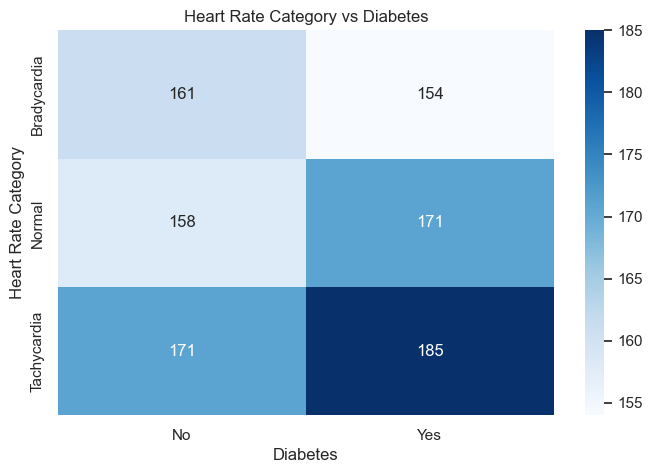

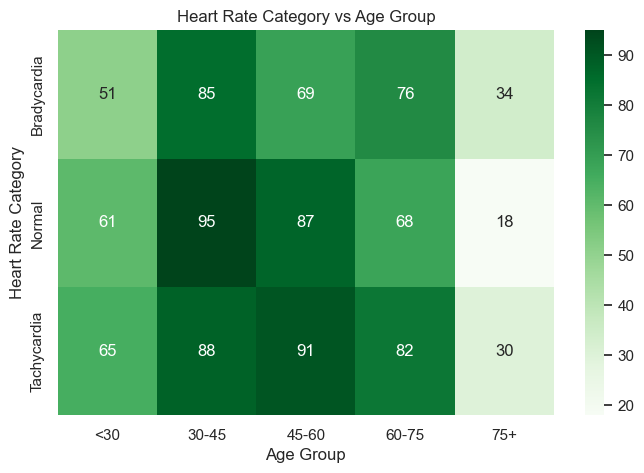

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Example dataset: Replace with your actual data
data = {
    'Heart_Rate_Category': np.random.choice(['Bradycardia', 'Normal', 'Tachycardia'], 1000),
    'Diabetes': np.random.choice(['Yes', 'No'], 1000),
    'Age': np.random.randint(20, 80, 1000)  # Replace with actual age data
}

df = pd.DataFrame(data)

# Create Age Groups
bins = [0, 30, 45, 60, 75, 100]
labels = ['<30', '30-45', '45-60', '60-75', '75+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# 1. Correlation between Heart Rate Category and Diabetes (Chi-Square Test)
contingency_table_diabetes = pd.crosstab(df['Heart_Rate_Category'], df['Diabetes'])
chi2_diabetes, p_diabetes, _, _ = chi2_contingency(contingency_table_diabetes)

print("Chi-Square Test: Heart Rate Category vs Diabetes")
print("Chi2 Statistic:", chi2_diabetes)
print("P-value:", p_diabetes)
print()

# 2. Correlation between Heart Rate Category and Age Group (Chi-Square Test)
contingency_table_age = pd.crosstab(df['Heart_Rate_Category'], df['Age_Group'])
chi2_age, p_age, _, _ = chi2_contingency(contingency_table_age)

print("Chi-Square Test: Heart Rate Category vs Age Group")
print("Chi2 Statistic:", chi2_age)
print("P-value:", p_age)
print()

# Visualizations
# Heatmap for Heart Rate Category and Diabetes
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table_diabetes, annot=True, cmap="Blues", fmt="d")
plt.title("Heart Rate Category vs Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Heart Rate Category")
plt.show()

# Heatmap for Heart Rate Category and Age Group
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table_age, annot=True, cmap="Greens", fmt="d")
plt.title("Heart Rate Category vs Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Rate Category")
plt.show()


In [ ]:
#Chi-Square Test Results
#Heart Rate Category vs. Diabetes:

#Chi2 Statistic: 0.82
#P-value: 0.66
#The high p-value (> 0.05) indicates no significant relationship between heart rate category and diabetes. 
#This means that heart rate categories do not vary meaningfully based on diabetes status.

#Heart Rate Category vs. Age Group:
#Chi2 Statistic: 9.71
#P-value: 0.29
#Similarly, the p-value (> 0.05) shows no significant relationship between heart rate category and age group. Age group does not strongly influence how individuals are distributed across heart rate categories.

#Conclusion
#The chi-square tests reveal that neither diabetes nor age group significantly impacts the distribution of individuals among the three heart rate categories
#in this dataset. This suggests that heart rate category is relatively independent of these factors.

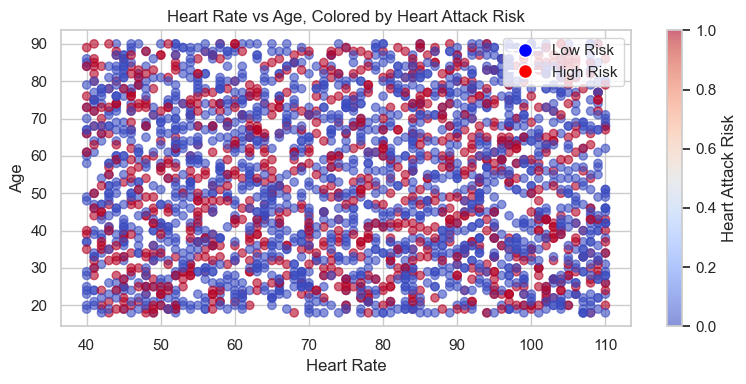

Heart Rate
40     32
41     38
42     33
43     36
44     43
       ..
106    35
107    30
108    42
109    38
110    38
Name: count, Length: 71, dtype: int64

Correlation between Heart Rate and Heart Attack Risk: -0.0078
Correlation between Age and Heart Attack Risk: -0.0033


In [111]:
#Heart Rate Category, Age, and Heart Attack Risk

#Scatter plot showing the relationship between Heart Rate, Age, and Heart Attack Risk
# Create the scatter plot
plt.figure(figsize=(8, 4))
scatter = plt.scatter(female_heart_df2['Heart Rate'], 
                      female_heart_df2['Age'], 
                      c=female_heart_df2['Heart Attack Risk'],
                      cmap='coolwarm', 
                      alpha=0.6)

# Customize the plot
plt.title('Heart Rate vs Age, Colored by Heart Attack Risk')
plt.xlabel('Heart Rate')
plt.ylabel('Age')
plt.colorbar(scatter, label='Heart Attack Risk')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Low Risk', markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', 
                              label='High Risk', markerfacecolor='red', markersize=10)]
plt.legend(handles=legend_elements, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# Display value counts of Heart Rate
print(female_heart_df2['Heart Rate'].value_counts().sort_index())

# Calculate and print correlations
correlation_hr_risk = female_heart_df2['Heart Rate'].corr(female_heart_df2['Heart Attack Risk'])
correlation_age_risk = female_heart_df2['Age'].corr(female_heart_df2['Heart Attack Risk'])
print(f"\nCorrelation between Heart Rate and Heart Attack Risk: {correlation_hr_risk:.4f}")
print(f"Correlation between Age and Heart Attack Risk: {correlation_age_risk:.4f}")

In [112]:
#Heart Rate 
    #Correlation between Heart Rate and Heart Attack Risk: -0.0078. extremely weak negative correlation suggests that there is virtually no linear relationship between heart rate and heart attack risk in this dataset.
    #value is so close to zero that it indicates heart rate is not a reliable predictor of heart attack risk for the females in this study.
    #Correlation between Age and Heart Attack Risk: -0.0033. Similarly, this correlation is also negligibly small and negative.
    #This implies that age has practically no linear association with heart attack risk in this female population.

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\1616710706.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


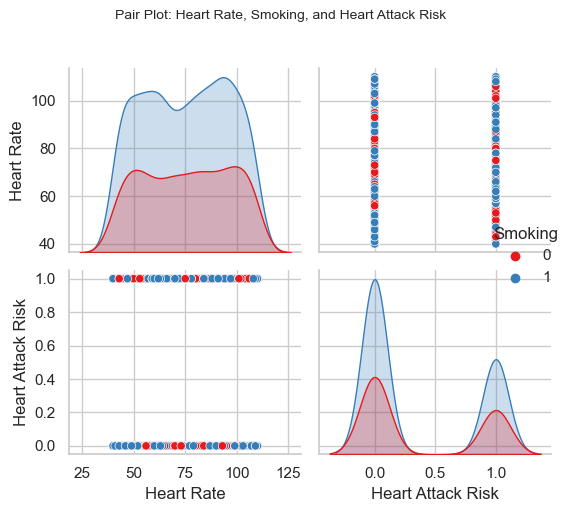

In [100]:
#Heart Rate, Smoking, and Heart Attack Risk
#Plot showing the relationship between Heart Rate, Smoking, and Heart Attack Risk

# Filter the data for females
female_data = female_heart_df2[['Heart Rate', 'Smoking', 'Heart Attack Risk']]

# Create a pair plot to show relationships between the variables
sns.pairplot(female_data, hue='Smoking', palette='Set1', diag_kind='kde')

# Customize the plot
plt.suptitle('Pair Plot: Heart Rate, Smoking, and Heart Attack Risk', y=1.02, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
#Analysis: Smoking is a high cntributor of an increase of heart reate and heart attack in the female population


In [113]:
#RISK FACTOR Family History'
#FAMILY HISTORY: Qualitative > Categorical > Nominal
female_heart_df2['Family History'].value_counts() #Family history of heart-related problems (1: Yes, 0: No)
#Analysis: out of 2652 female patients a total of 1303 equivalent to (49.1%) has Family history of heart-related problems (1)
                                     # a total of 1349 equivalent to (50.8%) do not have Family history of heart-related problems (0)

Family History
0    1349
1    1303
Name: count, dtype: int64

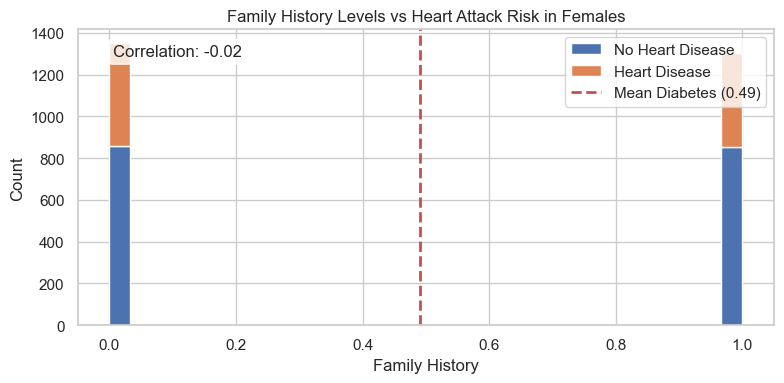

Mean Family History: 0.49
Correlation between Family History and Heart Disease: -0.02


In [114]:
#'Family History'

# Create separate datasets for those with and without heart disease
heart_disease = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 1]['Family History']
no_heart_disease = female_heart_df2[female_heart_df2['Heart Attack Risk'] == 0]['Family History']

# Create the histogram
plt.figure(figsize=(8, 4))
plt.hist([no_heart_disease, heart_disease], bins=30, stacked=True,
         label=['No Heart Disease', 'Heart Disease'])

plt.title('Family History Levels vs Heart Attack Risk in Females')
plt.xlabel('Family History')
plt.ylabel('Count')
plt.legend()

# Calculate and display the correlation coefficient
correlation = female_heart_df2['Family History'].corr(female_heart_df2['Heart Attack Risk'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add a vertical line for the mean cholesterol level
mean_diabetes = female_heart_df2['Family History'].mean()
plt.axvline(mean_diabetes, color='r', linestyle='dashed', linewidth=2, label=f'Mean Diabetes ({mean_diabetes:.2f})')

plt.legend()
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"Mean Family History: {mean_diabetes:.2f}")
print(f"Correlation between Family History and Heart Disease: {correlation:.2f}")

In [115]:
#'Family History' 
    #Analysis: The mean of 0.49 indicates that family history of heart disease is common in this population. 
    #The -0.02 correlation is negative meaning there is no relation of family history and heart attack risk.



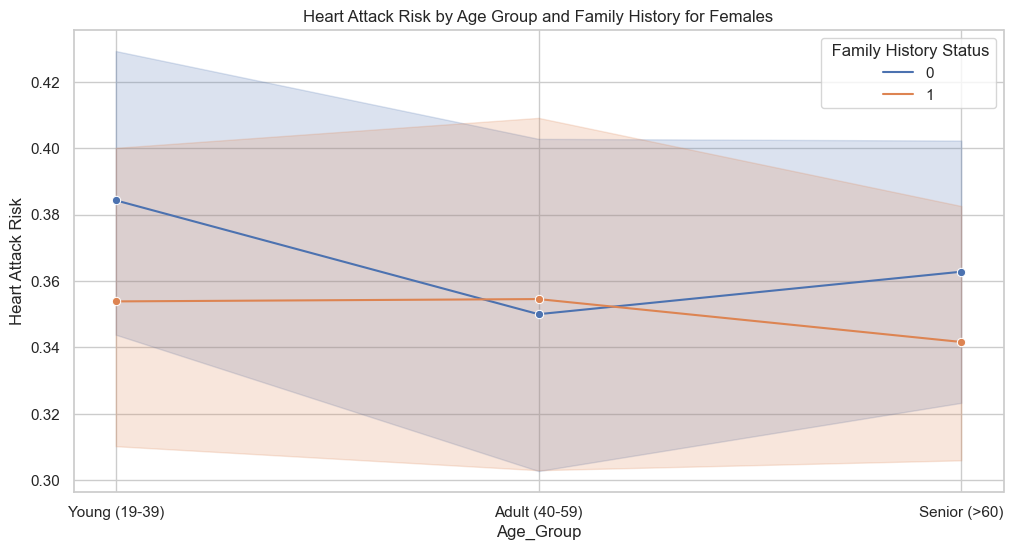

In [118]:
#'Family History' 
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_heart_df2, x='Age_Group', y='Heart Attack Risk', hue='Family History', marker='o')

# Customize the plot
plt.title('Heart Attack Risk by Age Group and Family History for Females')
plt.xlabel('Age_Group')
plt.ylabel('Heart Attack Risk')

# Add a legend
plt.legend(title=' Family History Status')

# Show the plot
plt.show()

In [119]:
#Analysis: The age indicates a potential heart attack risk by age 40 to 59 years old in th Adult group if you have a family history of heart attack.

In [120]:
#RISK FACTOR = Smoking
female_heart_df2['Smoking'].value_counts() #Smoking status of the patient (1: Smoker, 0: Non-smoker)
#Analysis: out of 2652 female patients a total of 1748 equivalent to (65.9%) is a smoker (1)
                                     # a total of  904 equivalent to (34.08%) do not smoke (0)



Smoking
1    1748
0     904
Name: count, dtype: int64

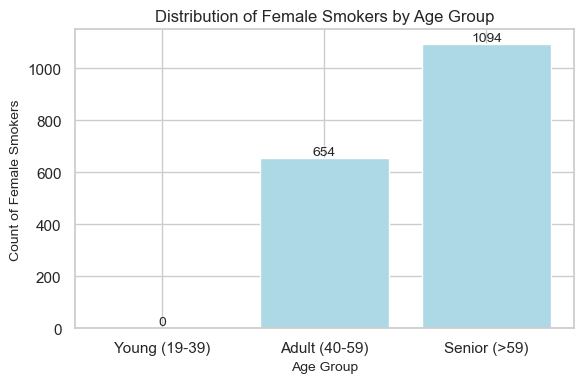

In [121]:
#RISK FACTOR = Smoking
# Define the age bins for young, adult, and senior categories
age_bins = [19, 39, 59, 100]  # Bins: 20-39 (Young), 40-59 (Adult), 60+ (Senior)

# Define the corresponding labels for each bin
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>59)']

# Add a new column to categorize ages into Young, Adult, and Senior
female_heart_df2['Age Group'] = pd.cut(female_heart_df2['Age'], bins=age_bins, labels=age_labels, right=True)

# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Count the number of smokers in each age group
smoker_age_group_counts = smokers['Age Group'].value_counts(sort=False)

# Plot the distribution of smokers by age group
plt.figure(figsize=(6, 4))

# Create a bar plot
bars = plt.bar(smoker_age_group_counts.index, smoker_age_group_counts.values, color='lightblue')

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of Female Smokers by Age Group', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

#Analysis: Females over the age of 59 years old have a high rate of smoking with 1094 and adult females between ages of 39 to 59 have 654 females in total

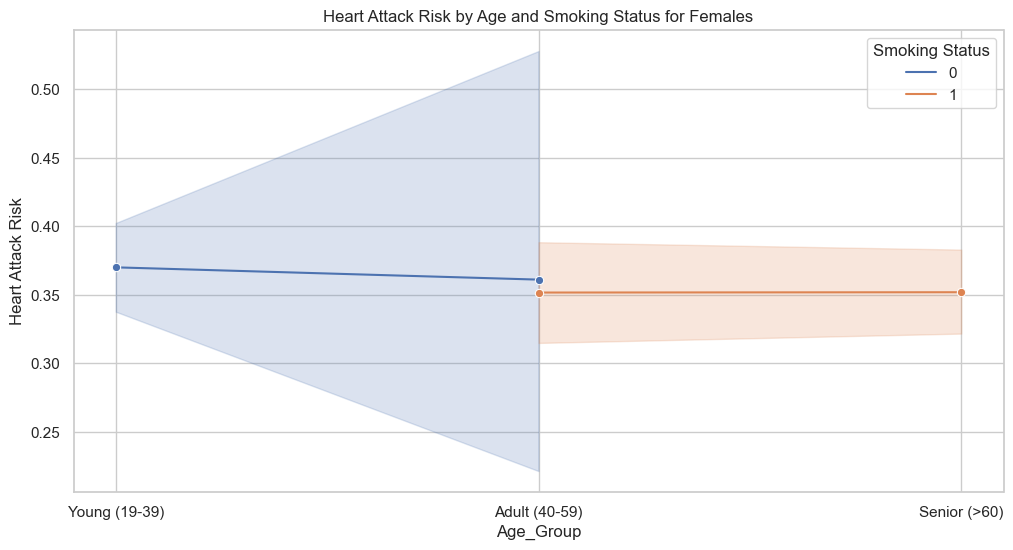

In [122]:
#RISK FACTOR = Smoking
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_heart_df2, x='Age_Group', y='Heart Attack Risk', hue='Smoking', marker='o')

# Customize the plot
plt.title('Heart Attack Risk by Age and Smoking Status for Females')
plt.xlabel('Age_Group')
plt.ylabel('Heart Attack Risk')

# Add a legend
plt.legend(title='Smoking Status')

# Show the plot
plt.show()

In [67]:
#Analysis: Smoking Yes (1) =1748 and (0) =904.
#The line graph indicates that Females between ages of 19 to 39 years old do not smoke. Females ages from 40 to 90 yers old smoke. 
#Also, the higest point is age 60 with more possibility of been at a heart attack risk.


In [123]:
#RISK FACTOR = Obesity
female_heart_df2['Obesity'].value_counts() #Obesity status of the patient (1: Obese, 0: Not obese)
#Analysis: out of 2652 female patients a total of 1748 equivalent to (49.9%) is obese (1)
                                     # a total of  1325 equivalent to (49.9%) is not obese (0)

Obesity
0    1327
1    1325
Name: count, dtype: int64

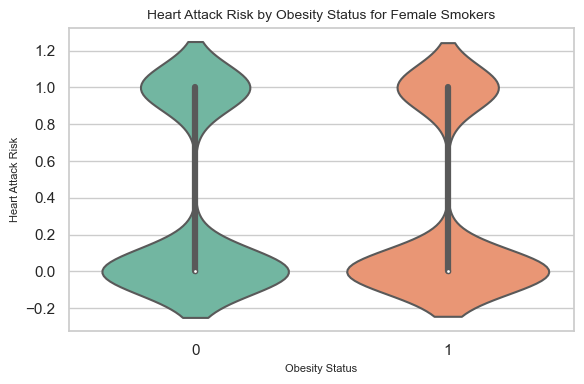

In [124]:
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Create the violin plot to show Heart Attack Risk distribution based on Obesity status for female smokers
plt.figure(figsize=(6, 4))
sns.violinplot(data=smokers, x='Obesity', y='Heart Attack Risk', palette='Set2')

# Customize the plot
plt.title('Heart Attack Risk by Obesity Status for Female Smokers', fontsize=10)
plt.xlabel('Obesity Status', fontsize=8)
plt.ylabel('Heart Attack Risk', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

In [125]:
#RISK FACTOR Alcohol Consumption
female_heart_df2['Alcohol Consumption'].value_counts() #Level of alcohol consumption by the patient (None/Light/Moderate/Heavy)
##Question: need to modify this variable to None, Ligth, Moderate, High

Alcohol Consumption
1    1582
0    1070
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14352\1909715617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smokers['Age_Group'] = pd.cut(smokers['Age'], bins=age_bins, labels=age_labels, right=False)


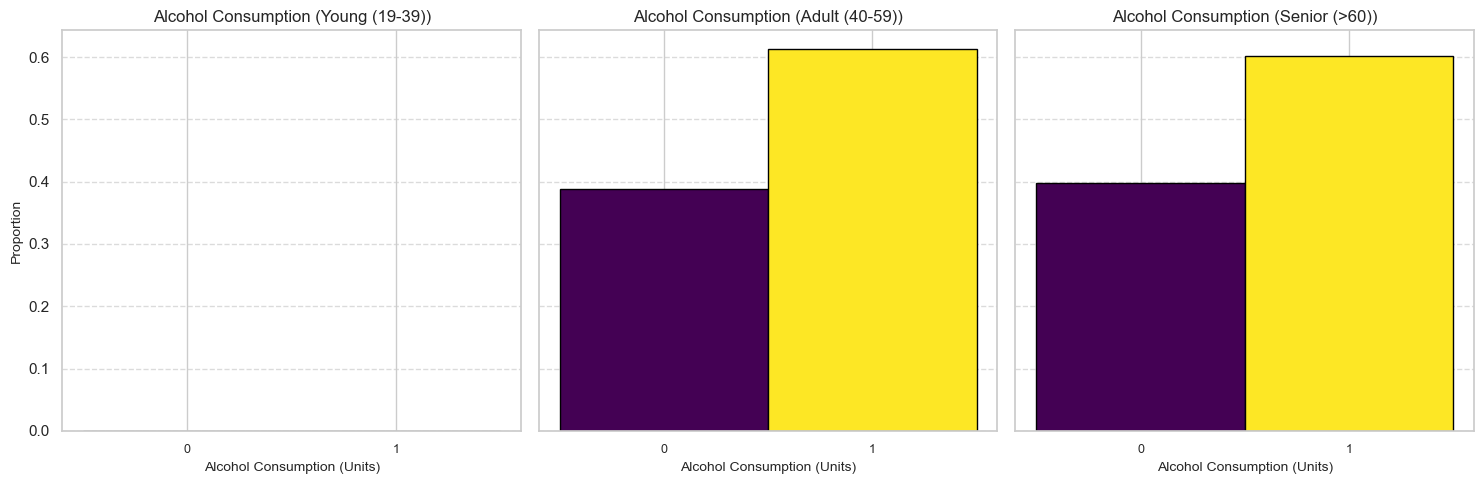

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Create Age Groups
age_bins = [18, 39, 59, np.inf]  # Define age ranges
age_labels = ['Young (19-39)', 'Adult (40-59)', 'Senior (>60)']
smokers['Age_Group'] = pd.cut(smokers['Age'], bins=age_bins, labels=age_labels, right=False)

# Plot the histograms for each Age Group
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Define bins for alcohol consumption levels
bins = range(0, int(smokers['Alcohol Consumption'].max()) + 2)

# Generate a colormap for bars
colors = plt.cm.viridis(np.linspace(0, 1, len(bins) - 1))

# Loop through each age group and plot
for i, age_group in enumerate(age_labels):
    group_data = smokers[smokers['Age_Group'] == age_group]
    counts, bin_edges = np.histogram(group_data['Alcohol Consumption'], bins=bins)
    proportions = counts / counts.sum() if counts.sum() > 0 else counts

    # Plot histogram
    for j in range(len(proportions)):
        axes[i].bar(bin_edges[j], proportions[j], width=1, color=colors[j], edgecolor='black', align='edge')

    # Set labels and titles
    axes[i].set_title(f'Alcohol Consumption ({age_group})', fontsize=12)
    axes[i].set_xlabel('Alcohol Consumption (Units)', fontsize=10)
    axes[i].set_xticks(bin_edges[:-1] + 0.5)
    axes[i].set_xticklabels(bin_edges[:-1], fontsize=9)

# Set shared y-axis label
axes[0].set_ylabel('Proportion', fontsize=10)

# Add gridlines
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


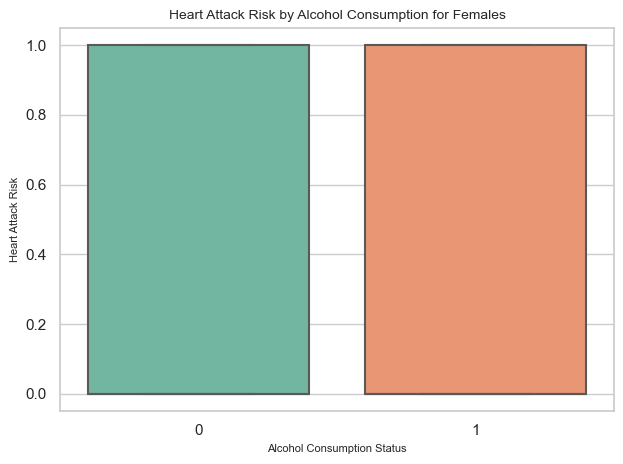

In [133]:
#heart Attack Risk distribution based on Alcohol Consumption
# Create the box plot to show Heart Attack Risk distribution based on Alcohol Consumption
sns.boxplot(data=female_heart_df2, x='Alcohol Consumption', y='Heart Attack Risk', palette='Set2')

# Customize the plot
plt.title('Heart Attack Risk by Alcohol Consumption for Females', fontsize=10)
plt.xlabel('Alcohol Consumption Status', fontsize=8)
plt.ylabel('Heart Attack Risk', fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()

In [132]:
#RISK FACTOR = Exercise Hours Per Week
female_heart_df2['Exercise Hours Per Week'].value_counts() #Number of exercise hours per week
#Analysis: This suggests that there is a wide variability in the number of exercise hours per week among females

Exercise Hours Per Week
2.078353     1
4.724424     1
4.776341     1
17.410809    1
6.491093     1
            ..
4.465392     1
15.516199    1
15.927327    1
19.205573    1
18.081748    1
Name: count, Length: 2652, dtype: int64

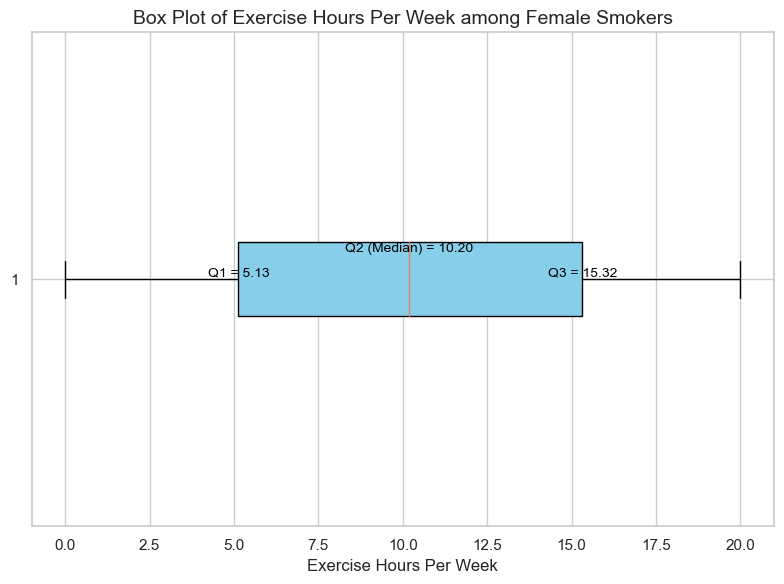

In [134]:
#RISK FACTOR = Exercise Hours Per Week
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate Q1, Q2 (median), and Q3 for Exercise Hours Per Week
Q1 = smokers['Exercise Hours Per Week'].quantile(0.25)
Q2 = smokers['Exercise Hours Per Week'].median()
Q3 = smokers['Exercise Hours Per Week'].quantile(0.75)

# Plot the box plot for exercise hours per week among female smokers
plt.figure(figsize=(8, 6))

# Create a box plot
plt.boxplot(smokers['Exercise Hours Per Week'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Set plot labels and title
plt.xlabel('Exercise Hours Per Week', fontsize=12)
plt.title('Box Plot of Exercise Hours Per Week among Female Smokers', fontsize=14)

# Annotate Q1, Q2, and Q3 values on the plot
plt.text(Q1, 1, f'Q1 = {Q1:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q2, 1.05, f'Q2 (Median) = {Q2:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q3, 1, f'Q3 = {Q3:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()
#Analysis: 
#Q1 (5.13 hours): 25% of the female smokers exercise fewer than 5.13 hours per week. Female smokers are less active, exercising less than 5.13 hours per week. 
#This could indicate a sedentary or low physical activity group.
#Q2 (Median = 10.20 hours): Female smokers exercise fewer than 10.20 hours per week, and half exercise more.  Most female smokers exercise about 10 hours per week, indicating a moderate level of physical activity for the majority of this group.
#Q3 (15.32 hours): 75% of female smokers exercise fewer than 15.32 hours per week, while 25% exercise more.


In [135]:
#RISK FACTOR = Diet
female_heart_df2['Diet'].value_counts() #Dietary habits of the patient (Healthy/Average/Unhealthy)
#Analysis: From 2652 female patiens 892 (33.6%) have a healthy diet. 890 (33.5%) Unhelathy diet and 870 (32.80%)Average diet

Diet
Healthy      892
Unhealthy    890
Average      870
Name: count, dtype: int64

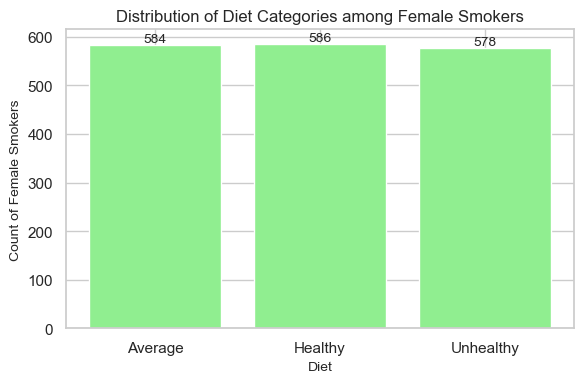

In [136]:
#RISK FACTOR = Diet
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate the count of diet categories for female smokers
diet_smokers = smokers['Diet'].value_counts().sort_index()

# Plot the distribution of diet categories for female smokers
plt.figure(figsize=(6, 4))

# Create a bar plot
bars = plt.bar(diet_smokers.index, diet_smokers.values, color='lightgreen')

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Diet', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of Diet Categories among Female Smokers', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: The diferent levels of diet between female smokers is equali distributed, whih out major impact or findings.

In [137]:
#RISK FACTOR = Previous Heart Problems
female_heart_df2['Previous Heart Problems'].value_counts() #Previous heart problems of the patient (1: Yes, 0: No)
#Analysis: From 2653 female patients 1311(49.4%) has previous heart problems (1) and 1341 (50.5%)do not have previous heart problems.

Previous Heart Problems
0    1341
1    1311
Name: count, dtype: int64

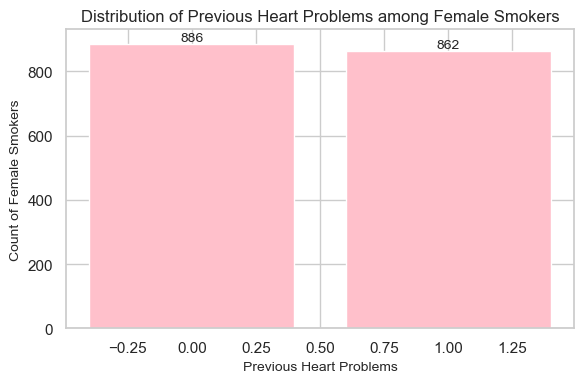

In [138]:
#RISK FACTOR = Previous Heart Problems
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate the count of previous heart problems for female smokers
heart_problems_smokers = smokers['Previous Heart Problems'].value_counts().sort_index()

# Plot the distribution of previous heart problems for female smokers
plt.figure(figsize=(6, 4))

# Create a bar plot
bars = plt.bar(heart_problems_smokers.index, heart_problems_smokers.values, color='pink')

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Previous Heart Problems', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of Previous Heart Problems among Female Smokers', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()

In [139]:
#RISK FACTOR = Stress Level
female_heart_df2['Stress Level'].value_counts()#Stress level reported by the patient (1-10)
#Analysis: stress levels of 5 or 6 are the most frequent,  9 with 294this would suggest that many women in the dataset report moderate to high levels of stress. The analysis could provide insights into whether higher stress levels are correlated with other risk factors, such as previous heart problems, and may help identify a common pattern among patients experiencing heart issues.

Stress Level
9     294
4     272
3     272
10    272
5     265
2     264
7     260
8     258
6     251
1     244
Name: count, dtype: int64

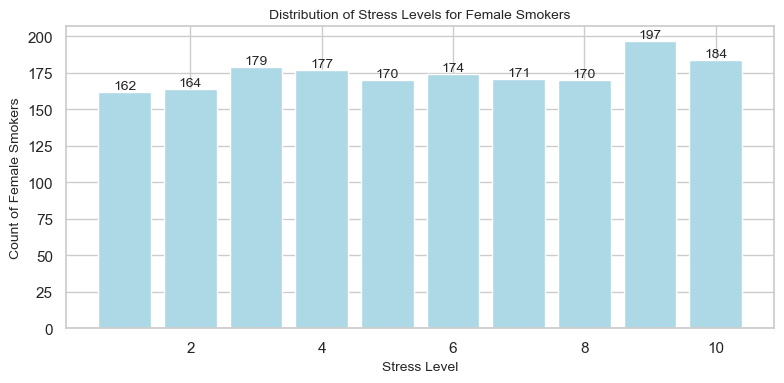

In [140]:
#RISK FACTOR = Stress Level
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate the count of stress levels for female smokers
stress_level_smokers = smokers['Stress Level'].value_counts().sort_index()

# Plot the distribution of stress levels for female smokers
plt.figure(figsize=(8, 4))

# Create a bar plot
bars = plt.bar(stress_level_smokers.index, stress_level_smokers.values, color='lightblue')

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Stress Level', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of Stress Levels for Female Smokers', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: The highest number of stress levels are 9 and 10 with a total of female smokers of 197 females and 184

In [141]:
#RISK FACTOR=Sedentary Hours Per Day
female_heart_df2['Sedentary Hours Per Day'].value_counts() #Hours of sedentary activity per day
#Analysis:the results indicate that each value appears only once, meaning that the number of sedentary hours per day varies widely across the femailes in the dataset. 


Sedentary Hours Per Day
9.463426     1
7.335684     1
3.102531     1
9.982953     1
6.113922     1
            ..
4.802500     1
6.434891     1
9.566897     1
11.200160    1
9.005234     1
Name: count, Length: 2652, dtype: int64

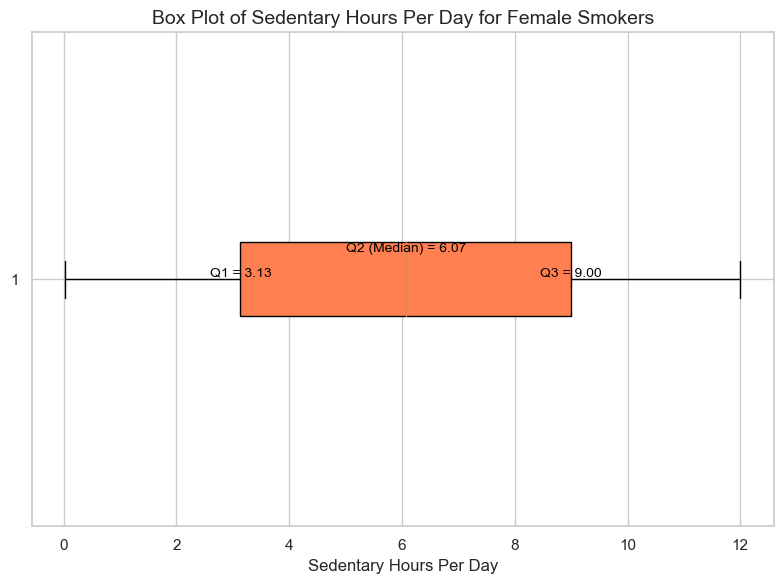

In [142]:
#RISK FACTOR=Sedentary Hours Per Day
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate Q1, Q2 (median), and Q3 for Sedentary Hours Per Day
Q1 = smokers['Sedentary Hours Per Day'].quantile(0.25)
Q2 = smokers['Sedentary Hours Per Day'].median()  # This is the same as the second quartile
Q3 = smokers['Sedentary Hours Per Day'].quantile(0.75)

# Plot the box plot for sedentary hours per day for female smokers
plt.figure(figsize=(8, 6))

# Create a box plot
plt.boxplot(smokers['Sedentary Hours Per Day'], vert=False, patch_artist=True, boxprops=dict(facecolor='coral'))

# Set plot labels and title
plt.xlabel('Sedentary Hours Per Day', fontsize=12)
plt.title('Box Plot of Sedentary Hours Per Day for Female Smokers', fontsize=14)

# Annotate Q1, Q2 (median), and Q3 values on the plot
plt.text(Q1, 1, f'Q1 = {Q1:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q2, 1.05, f'Q2 (Median) = {Q2:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q3, 1, f'Q3 = {Q3:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.show()
#Analysis: 
#Q1 (3.13 hours): 25% of female smokers have less than 3.13 sedentary hours per day. A smaller portion of female smokers lead a relatively active lifestyle, with their sedentary time being relatively low.
#Q2 (Median = 6.07 hours): The median of 6.07 hours indicates that half of the female smokers have less than 6.07 hours of sedentary behavior per day, and half have more.
#Female smoker spends about 6 hours per day being sedentary, which may be considered moderate in terms of physical inactivity.
#Q3 (9 hours):The third quartile value of 9 hours means that 75% of female smokers have less than 9 hours of sedentary behavior per day.#
#The top 25% of female smokers (the most sedentary) spend 9 or more hours per day being sedentary, indicating a high level of inactivity for a significant portion of the population.

In [145]:
#RISK FACTOR = 'BMI'
female_heart_df2['BMI'].value_counts() # Income level of the patient
#Analysis: BMI indicate that each value appears only once in the dataset, meaning that every female has a unique Body Mass Index. 

BMI
28.176571    1
27.806442    1
39.970515    1
38.880157    1
36.562879    1
            ..
24.167016    1
31.061754    1
27.441711    1
21.094200    1
32.914151    1
Name: count, Length: 2652, dtype: int64

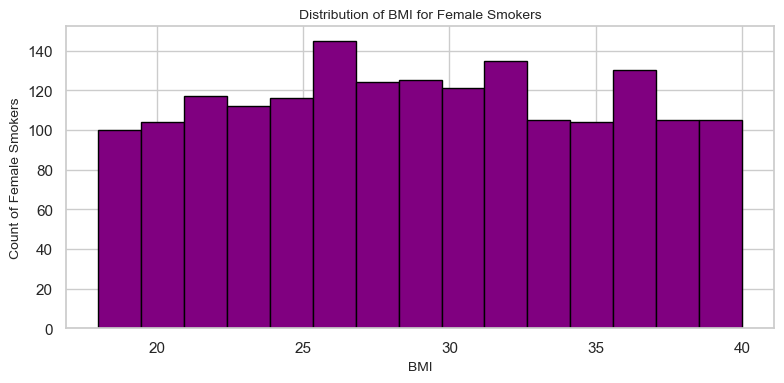

In [84]:
#RISK FACTOR = 'BMI'
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Plot the histogram for BMI of female smokers
plt.figure(figsize=(8, 4))

plt.hist(smokers['BMI'], bins=15, color='purple', edgecolor='black')

# Set plot labels and title
plt.xlabel('BMI', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of BMI for Female Smokers', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: The BMI of females that smoke has a uniform distribution from 20 to 40 BMI. 

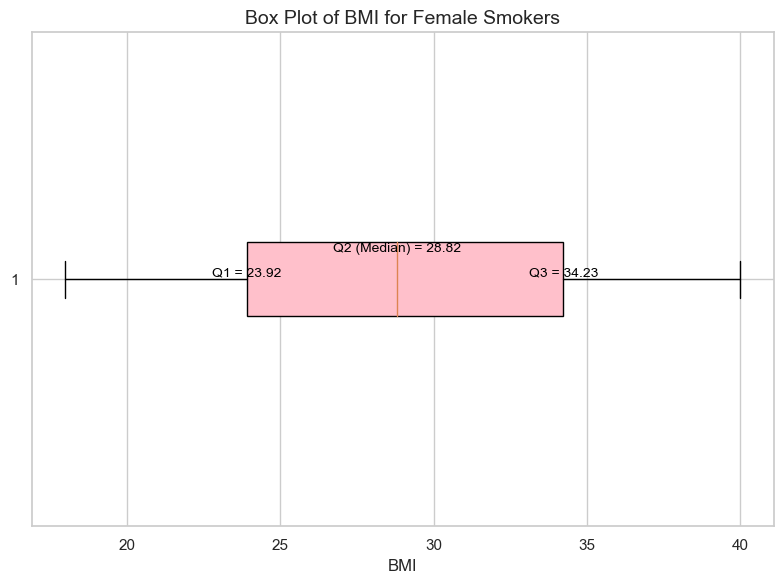

In [85]:
#RISK FACTOR = 'BMI'
# Filter the data for female smokers
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate Q1, Q2 (median), and Q3 for BMI
Q1 = smokers['BMI'].quantile(0.25)
Q2 = smokers['BMI'].median()  # This is the same as the second quartile
Q3 = smokers['BMI'].quantile(0.75)

# Plot the box plot for BMI of female smokers
plt.figure(figsize=(8, 6))

box = plt.boxplot(smokers['BMI'], vert=False, patch_artist=True, boxprops=dict(facecolor='pink'))

# Set plot labels and title
plt.xlabel('BMI', fontsize=12)
plt.title('Box Plot of BMI for Female Smokers', fontsize=14)

# Display Q1, Q2 (median), and Q3 on the plot
plt.text(Q1, 1, f'Q1 = {Q1:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q2, 1.05, f'Q2 (Median) = {Q2:.2f}', ha='center', va='bottom', fontsize=10, color='black')
plt.text(Q3, 1, f'Q3 = {Q3:.2f}', ha='center', va='bottom', fontsize=10, color='black')

# Show plot
plt.tight_layout()
plt.show()

#Analysis: from 1748 females smokers, 
#Q1 (25th percentile = 23.92): 25% of the female smokers have a BMI below 23.92.Fall into the "normal weight" or the lower end of the BMI range. 
    #As BMI values between 18.5 and 24.9 are typically considered normal.
#Q2 (50th percentile or Median = 28.82):50% of the female smokers have a BMI below 28.82 and 50% have a BMI above this value.
    #A BMI of 28.82 falls into the overweight category (BMI between 25 and 29.9). Therefore, half of the female smokers are either overweight or obese.

In [86]:
#RISK FACTOR =Physical Activity Days Per Week
female_heart_df2['Physical Activity Days Per Week'].value_counts() #Days of physical activity per week
#Analysis: The results for Physical Activity Days Per Week indicate a distribution of how frequently females engage in physical activity. 
#For example, 1 day per week is the most common with 348 patients, followed closely by 7 days with 343 patients. Other values include 3 days (339), 6 days (338), and 0 days (312), showing a range of physical activity habits.
#This suggests a diverse level of engagement in physical activity among the patients, with a significant portion being either minimally active or highly active throughout the week.

Physical Activity Days Per Week
1    348
7    343
3    339
6    338
2    333
4    330
0    312
5    309
Name: count, dtype: int64

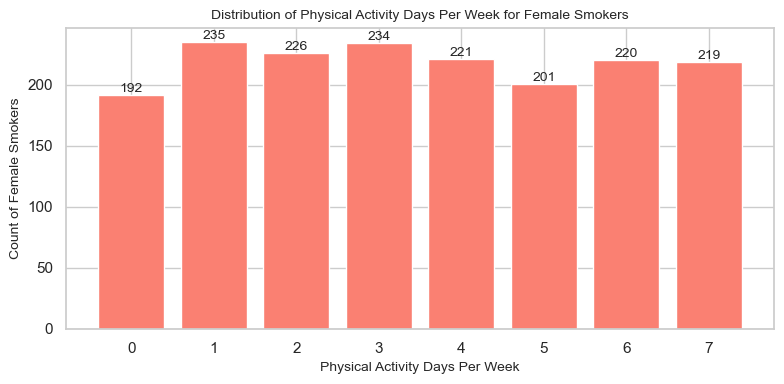

In [87]:
#RISK FACTOR = Physical Activity Days Per Week

# Filter the data for females who smoke
smokers = female_heart_df2[female_heart_df2['Smoking'] == 1]

# Calculate the count of physical activity days per week for smokers
physical_activity_smokers = smokers['Physical Activity Days Per Week'].value_counts().sort_index()

# Plot the distribution of physical activity days per week for smokers
plt.figure(figsize=(8, 4))

# Plot for smokers
bars = plt.bar(physical_activity_smokers.index, physical_activity_smokers.values, color='salmon')

# Annotate the bars with the counts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Physical Activity Days Per Week', fontsize=10)
plt.ylabel('Count of Female Smokers', fontsize=10)
plt.title('Distribution of Physical Activity Days Per Week for Female Smokers', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: Females that smoke have a physicial activity of 1 to 3 days of physical activity per week.  

In [88]:
#RISK FACTOR = SLEEP HOURS
female_heart_df2['Sleep Hours Per Day'].value_counts()
#Analysis: The results for Sleep Hours Per Day indicate how many hours patients sleep on average, showing the frequency of each value. For example, for the females in the dataset 8 hours per day is the most common, with 411 patients, followed by 10 hours with 398 patients. Other common values include 7 hours (378 patients), 4 hours (376), and 5 hours (369). This suggests that most female patients sleep between 4 to 10 hours daily, with a notable number getting the recommended 7-8 hours of sleep per night.

Sleep Hours Per Day
8     411
10    398
7     378
4     376
5     369
9     362
6     358
Name: count, dtype: int64

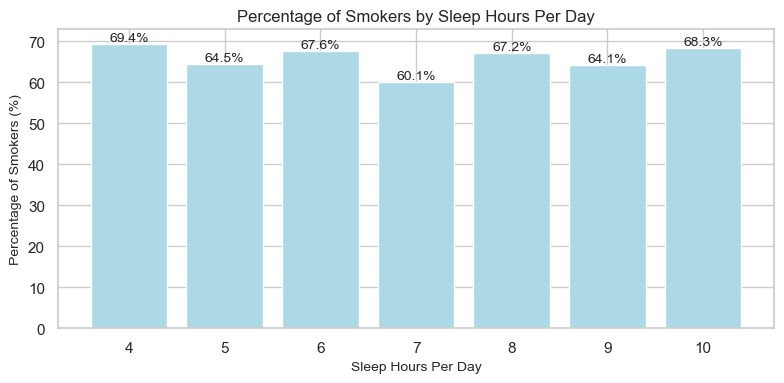

In [89]:
#RISK FACTOR = SLEEP HOURS
# Calculate smoking statistics for each sleep duration
smoking_by_sleep = female_heart_df2.groupby('Sleep Hours Per Day')['Smoking'].value_counts(normalize=True).unstack()

# Select the proportion of smokers (assuming 1 indicates smoking and 0 indicates non-smoking)
smoking_percentage_sleep = smoking_by_sleep[1] * 100  # Multiply by 100 to get percentages

# Drop sleep hours with no smoking data (optional)
smoking_percentage_sleep = smoking_percentage_sleep.dropna()

# Plot the results
plt.figure(figsize=(8, 4))
bars = plt.bar(smoking_percentage_sleep.index, smoking_percentage_sleep.values, color='lightblue')

# Annotate the bars with the smoking percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Sleep Hours Per Day', fontsize=10)
plt.ylabel('Percentage of Smokers (%)', fontsize=10)
plt.title('Percentage of Smokers by Sleep Hours Per Day', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: Females taht smoke sleep 4 hours with a rate of 69.4% or 10 hours with 68.3% of the females in the data set

In [90]:
#LOCATION= CONTINENT
female_heart_df2['Continent'].value_counts() 

Continent
Asia             755
Europe           700
South America    435
Africa           256
North America    254
Australia        252
Name: count, dtype: int64

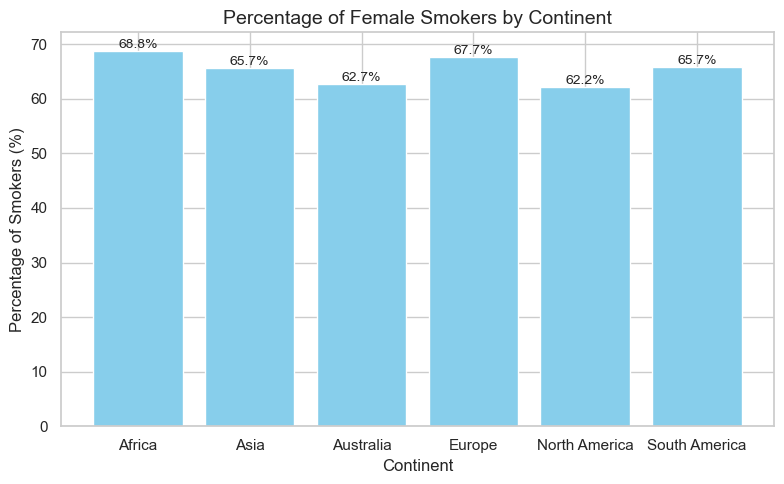

In [91]:
#LOCATION= CONTINENT
# Calculate smoking statistics for each continent
smoking_by_continent = female_heart_df2.groupby('Continent')['Smoking'].value_counts(normalize=True).unstack()

# Select the proportion of smokers (assuming 1 indicates smoking and 0 indicates non-smoking)
smoking_percentage_continent = smoking_by_continent[1] * 100  # Multiply by 100 to get percentages

# Drop continents with no smoking data (optional)
smoking_percentage_continent = smoking_percentage_continent.dropna()

# Find the continent with the highest smoking percentage
continent_with_most_smoking = smoking_percentage_continent.idxmax()
highest_smoking_percentage = smoking_percentage_continent.max()

# Plot the results
plt.figure(figsize=(8, 5))
bars = plt.bar(smoking_percentage_continent.index, smoking_percentage_continent.values, color='skyblue')

# Highlight the continent with the highest smoking rate
for bar in bars:
    if bar.get_x() == smoking_percentage_continent.index.get_loc(continent_with_most_smoking):
        bar.set_color('orange')

# Annotate the bars with the smoking percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Set plot labels and title
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Percentage of Smokers (%)', fontsize=12)
plt.title('Percentage of Female Smokers by Continent', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()
#Analysis: The continents with the higest percentage of Female Smokers by Continent are Africa (68.8), Euro(67.7), and Asia and South America (65.7%)

In [92]:
#LOCATION = country
female_heart_df2['Country'].value_counts() 
#Analysis: The country with more females is Argentina folowed by France

Country
Argentina         158
France            149
Germany           146
Colombia          142
Italy             140
China             140
Canada            135
Brazil            135
Australia         133
Spain             133
United Kingdom    132
Thailand          132
Nigeria           129
Vietnam           128
South Africa      127
South Korea       122
New Zealand       119
United States     119
Japan             119
India             114
Name: count, dtype: int64

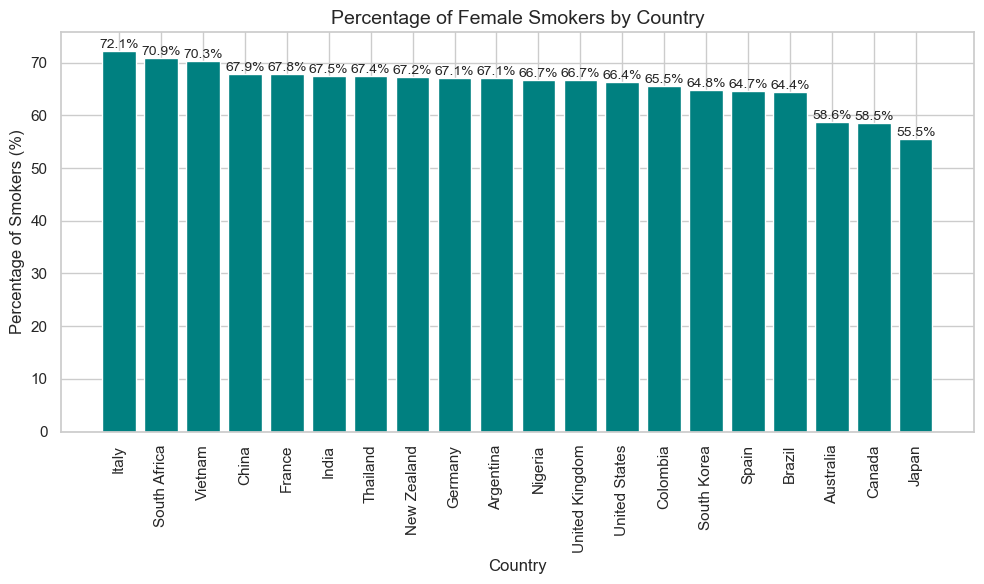

In [93]:
#LOCATION = COUNTRY
# Calculate smoking statistics for each country
smoking_by_country = female_heart_df2.groupby('Country')['Smoking'].value_counts(normalize=True).unstack()

# Select the proportion of smokers (assuming 1 indicates smoking and 0 indicates non-smoking)
smoking_percentage = smoking_by_country[1] * 100  # Multiply by 100 to get percentages

# Drop countries with no smoking data (optional)
smoking_percentage = smoking_percentage.dropna()

# Sort values for better visualization
smoking_percentage = smoking_percentage.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(smoking_percentage.index, smoking_percentage.values, color='teal')

# Set plot labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Smokers (%)', fontsize=12)
plt.title('Percentage of Female Smokers by Country', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Annotate the bars with the smoking percentages
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

#Analysis: The top three countries with the highest population of female smokers are Italy (72.1%), South Africa (70.9%) abd Vietnam (70.3%)